<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#newly-created-functions" data-toc-modified-id="newly-created-functions-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>newly created functions</a></span></li><li><span><a href="#functions-from-other-notebooks" data-toc-modified-id="functions-from-other-notebooks-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>functions from other notebooks</a></span></li></ul></li><li><span><a href="#irreversible-reaction,-many-worlds" data-toc-modified-id="irreversible-reaction,-many-worlds-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>irreversible reaction, many worlds</a></span><ul class="toc-item"><li><span><a href="#4-species" data-toc-modified-id="4-species-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>4 species</a></span><ul class="toc-item"><li><span><a href="#world-0" data-toc-modified-id="world-0-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>world 0</a></span></li><li><span><a href="#world1" data-toc-modified-id="world1-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>world1</a></span></li><li><span><a href="#average-across-worlds" data-toc-modified-id="average-across-worlds-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>average across worlds</a></span></li></ul></li><li><span><a href="#6-species" data-toc-modified-id="6-species-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>6 species</a></span><ul class="toc-item"><li><span><a href="#world-0" data-toc-modified-id="world-0-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>world 0</a></span></li><li><span><a href="#average-across-worlds" data-toc-modified-id="average-across-worlds-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>average across worlds</a></span><ul class="toc-item"><li><span><a href="#for-sim2-with-50-worlds" data-toc-modified-id="for-sim2-with-50-worlds-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>for sim2 with 50 worlds</a></span></li><li><span><a href="#for-sim3-with-50-worlds-and-slightly-larger-dG-values" data-toc-modified-id="for-sim3-with-50-worlds-and-slightly-larger-dG-values-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>for sim3 with 50 worlds and slightly larger dG values</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#varying-dG-scale-plots" data-toc-modified-id="varying-dG-scale-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>varying dG scale plots</a></span></li><li><span><a href="#varying-dG-of-1-reaction" data-toc-modified-id="varying-dG-of-1-reaction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>varying dG of 1 reaction</a></span><ul class="toc-item"><li><span><a href="#R1-R4-reaction" data-toc-modified-id="R1-R4-reaction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>R1-R4 reaction</a></span></li></ul></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sys import exit
import pandas as pd
import glob
import pickle
from textwrap import wrap
import time
import itertools
from scipy import integrate
from scipy.spatial import distance
from scipy import stats
from copy import deepcopy
import sys
import matplotlib as mpl

sys.path.append('/Users/ashish/Documents/GitHub/metabolic-CRmodel/')



import importlib
import metabolic_CR_model_functions 
import metabolic_CR_model_class
importlib.reload(metabolic_CR_model_functions)
importlib.reload(metabolic_CR_model_class)
from metabolic_CR_model_functions import *
from metabolic_CR_model_class import *


fontSize=12
fontSizeSmall=10
labelSize=8


machine_precision=1e-6





'''
figure size and font settings
'''   
## figure settings
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

# plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight='bold')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')

def create_color_list(scheme_name='sns_tab10'): 
    #https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    #https://seaborn.pydata.org/tutorial/color_palettes.html
    if scheme_name.lower()=='tableau':
        color_list=list(mcolors.TABLEAU_COLORS.values())## only had 10 colors
    elif scheme_name.lower()=='css':
        color_list=list(mcolors.CSS4_COLORS.values())
    elif scheme_name.lower()=='base':
        color_list=list(mcolors.BASE_COLORS.values())
    elif scheme_name.lower()=='sns_tab10':
        color_list=list(sns.color_palette(palette='tab10'))
    elif scheme_name.lower()=='sns_deep':
        color_list=list(sns.color_palette(palette='deep'))
    elif scheme_name.lower()=='sns_muted':
        color_list=list(sns.color_palette(palette='muted'))
    elif scheme_name.lower()=='sns_colorblind':
        color_list=list(sns.color_palette(palette='colorblind'))
    elif scheme_name.lower()=='sns_spectral':
        color_list=list(sns.color_palette(palette='Spectral'))
    else:
        print ('scheme not implemented')
    if 'sns' not in scheme_name.lower():
        color_list=[color for color in color_list if sum(mcolors.to_rgb(color))<2.5] ## remove white
        mcolors.to_rgb(color_list[0])
    return  color_list

def statistics_of_outcomes(flux_in_community_list,reactions_in_final_community_list,
                              number_of_pools):
    flx_cutoff=1e-3
    flux_in_community_arr=np.array(flux_in_community_list)
    flux_in_community_arr[flux_in_community_arr<flx_cutoff]=0.       
    functional_distance_arr=distance.pdist(flux_in_community_arr,metric='jensenshannon')   
    nonzero_flux_counter=np.sum(flux_in_community_arr>flx_cutoff,axis=0)    
    outcome_stats={'functional_distance_arr':functional_distance_arr,
                  'nonzero_flux_counter':nonzero_flux_counter}
    return outcome_stats

def create_analysis_df(data_folder,file_name):
    analysis_file_name = 'analysis_'+file_name
    with open(data_folder+file_name, 'rb') as f:
        data_df = pickle.load(f)

    exp_conditions_list = data_df['exp_conditions_list']
    analysis_df = {'exp_conditions_list': exp_conditions_list}
    number_of_pools = data_df['number_of_pools']
    for expt_id, exp_condition in enumerate(exp_conditions_list):
        n_survivors_list = []
        reactions_in_final_community_list = []  # list of reactions in final community
        # list of reactions split by survivors as well
        reactions_in_final_survivors_list = []
        abundance_of_survivors_list = []
        idx_of_survivors_list = []
        enzyme_and_abundance_weighted_reactions_in_survivors_list = []
        enzyme_budget_allocated_to_reactions_in_survivors_list=[]
        fluxes_by_survivors_list=[]
        flux_in_community_list=[]
        params_list=[]
        for pool_id in range(number_of_pools):
            #         print(exp_condition,pool_id)
            current_df = data_df['pool'+str(pool_id)]['expt'+str(expt_id)]
            params_df=current_df['params']  
            params_list.append(params_df)
            Nf, Rf, Tf = current_df['SS_values']
            Nf = np.ravel(Nf)
            idx_survivors = np.ravel(np.nonzero(Nf))
            n_survivors_list.append(len(idx_survivors))
            n_reactions = params_df['n_reactions']
            reactions_in_final_community = np.zeros(n_reactions).astype(int)
            reactions_in_final_survivors = []
            abundance_of_survivors = []
            enzyme_and_abundance_weighted_reactions_in_survivors = []
            enzyme_budget_allocated_to_reactions_in_survivors = []
            fluxes_by_survivors=[]
            if len(idx_survivors) > 0:
                abundance_of_survivors = Nf[idx_survivors]
                if 'thermodynamic' in params_df['assumptions']['growth_type']:
                    nu_matrix = params_df['Enzyme_alloc']
                elif 'anabolism' in params_df['assumptions']['growth_type']:
                    nu_matrix = params_df['Enzyme_alloc']
                elif 'Michaelis-Menten' in params_df['assumptions']['growth_type']:
                    nu_matrix = params_df['Enzyme_alloc']
                elif 'product' in params_df['assumptions']['growth_type']:
                    nu_matrix = params_df['nu_max']
                for survivor in idx_survivors:
                    reactions_in_final_community[np.nonzero(
                        nu_matrix[survivor])] += 1
                    temp = np.zeros(n_reactions)
                    temp[np.nonzero(nu_matrix[survivor])] = 1
                    reactions_in_final_survivors.append(list(temp))
                    enzyme_and_abundance_weighted_reactions_in_survivors.append(
                        nu_matrix[survivor]*Nf[survivor])
                    enzyme_budget_allocated_to_reactions_in_survivors.append(
                        nu_matrix[survivor]/np.sum(nu_matrix[survivor]))
                def calc_fluxes(N,R,params):
                    return Make_flux_calculator(params_df['assumptions'])(N,R,params)
                fluxes_SS=calc_fluxes(Nf, Rf, params_df)
    #             tot_flux=np.sum(fluxes_SS,axis=0)
                for survivor in idx_survivors:          
                    fluxes_by_survivors.append(fluxes_SS[survivor]) 
                flux_community=np.sum(np.array(fluxes_by_survivors),axis=0)

            fluxes_by_survivors_list.append(fluxes_by_survivors)
            flux_in_community_list.append(flux_community)
    #         print('community',reactions_in_final_community)
            idx_of_survivors_list.append(idx_of_survivors_list)
            abundance_of_survivors_list.append(abundance_of_survivors)
            enzyme_and_abundance_weighted_reactions_in_survivors_list.append(
                enzyme_and_abundance_weighted_reactions_in_survivors)
            enzyme_budget_allocated_to_reactions_in_survivors_list.append(enzyme_budget_allocated_to_reactions_in_survivors)
            # list of reactions in final community
            reactions_in_final_community_list.append(reactions_in_final_community)
            reactions_in_final_survivors_list.append(reactions_in_final_survivors)

    #         print (exp_condition, pool_id)
    #         print ('idx survivors', idx_survivors)
    #         print ('survivor abundance',len(abundance_of_survivors), abundance_of_survivors)
    #         print ('survivor fluxes',np.shape(fluxes_by_survivors), fluxes_by_survivors)
    #         print ('reactions in survivors', np.shape(reactions_in_final_survivors), reactions_in_final_survivors)

        reaction_substrates=params_df['substrates']
        reaction_products=params_df['products']
        outcome_stats=statistics_of_outcomes(flux_in_community_list,reactions_in_final_community_list,
                              number_of_pools)  
        temp_df={'reactions_in_final_community_list': reactions_in_final_community_list,
                   'reactions_in_final_survivors_list': reactions_in_final_survivors_list,
                   'exp_condition': exp_condition,
                   'n_survivors_list': n_survivors_list,
                   'reaction_substrates': reaction_substrates, 'reaction_products': reaction_products,
                   'idx_of_survivors': idx_of_survivors_list, 'abundance_of_survivors': abundance_of_survivors_list,
                   'enzyme_and_abundance_weighted_reactions_in_survivors': enzyme_and_abundance_weighted_reactions_in_survivors_list,
                'enzyme_budget_allocated_to_reactions_in_survivors_list': enzyme_budget_allocated_to_reactions_in_survivors_list,
                 'fluxes_by_survivors_list':fluxes_by_survivors_list,'flux_in_community_list':flux_in_community_list,
                 'sim_params':params_list
                }
        temp_df.update(outcome_stats)
        n_resources=len(Rf)
        n_reactions=len(reaction_substrates)
        analysis_df.update({'expt'+str(expt_id): temp_df})

    analysis_df.update({'reaction_substrates': reaction_substrates,
                        'reaction_products': reaction_products,
                        'n_resources': n_resources, 'n_reactions': n_reactions,
                       'number_of_pools':number_of_pools})
    with open(data_folder+analysis_file_name, 'wb') as f:
        pickle.dump(analysis_df, f, protocol=2)
        


## newly created functions

In [6]:
def plot_rxn_nwk_Fluxes_and_maxDissip_piechart(analysis_df,sim_data_df, plot_for_R_Expt=None,
                                          pool_ids=np.arange(10).astype(int),
                                          area_scale_factor=100.,
                                         param_varied='',rel_flux_cutoff=1e-2
                                              ):
    n_resources=analysis_df['n_resources']
    n_reactions=analysis_df['n_reactions']
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    exp_conditions_list = analysis_df['exp_conditions_list']
    n_pools=len(pool_ids)
    color_list=create_color_list(scheme_name='sns_deep')
    n_exp_conditions=len(exp_conditions_list)
    fig= plt.figure(figsize=(5*(n_pools+1),5*n_exp_conditions))
    for pool_ctr, pool_id in enumerate(pool_ids):
        for expt_id, exp_condition in enumerate(exp_conditions_list):
            expt_df = analysis_df['expt'+str(expt_id)]
            reactions_in_final_survivors_list = expt_df['reactions_in_final_survivors_list']
            abundance_list=expt_df['abundance_of_survivors']
#             Enz_and_N_weighted_reactions_in_survivors_list=expt_df['enzyme_and_abundance_weighted_reactions_in_survivors']
            reactions_in_survivors=np.array(reactions_in_final_survivors_list[pool_id]  )
            abundance_survivors=abundance_list[pool_id]
#             Enz_and_N_weighted_reactions=np.array(Enz_and_N_weighted_reactions_in_survivors_list[pool_id])
            fluxes_by_survivors_list=expt_df['fluxes_by_survivors_list']
            fluxes_by_survivors_arr= np.array(fluxes_by_survivors_list[pool_id])
            params_df=expt_df['sim_params'][pool_id]
#             print(np.shape(fluxes_by_survivors_arr))
#             print(np.shape(Enz_and_N_weighted_reactions))
            
#             ax1 = fig.add_subplot(1,n_pools,pool_ctr+1)
            ax1 = fig.add_subplot(n_exp_conditions,n_pools+1,
                                  expt_id*(n_pools+1)+ pool_ctr+1)


            if n_resources==4:    
                resources_dict={0:[0.5, .95],1:[0.1, .7],
                               2:[0.95, .39],
                               3:[0.23, .05]}
            elif n_resources==6:
                resources_dict={0:[0.5, .97],1:[0.15, .75],
                               2:[0.3, .55],
                               3:[0.9, .42], 4:[0.6, .2],
                               5:[0.5, .02]}
            else:
                print('this nresources has not been positioned yet',n_resources)
                sys.exit(1)

            for ax in [ax1]:
                for key,val in resources_dict.items():    
                    ax.text(val[0],val[1],'R'+str(key), color='black',
                             bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')

#                     ax.text(val[0],val[1],'R'+str(key)+' ({:.1f})'.format(
#                         params_df['Energies'][key] ), color='black',
#                              bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')
                    ##draw arrows
#                     for i in range(n_reactions):   
#                         ax.annotate('',xy=(resources_dict[products[i]]),
#                                      xytext=(resources_dict[substrates[i]]),
#                                      arrowprops=dict(facecolor='black', shrink=0.075,width=1))
                ax.set_xticks([])  
                ax.set_yticks([])  
        

        #### add inset axis and pie chart to each reaction.
            ax_subplot=ax1

            if len(abundance_survivors)>0: ## if there are any survivors at all
                for reaction in range(n_reactions):                 
                    h,w=0.15,0.15
                    x,y=(np.array(resources_dict[products[reaction]])+         
                         np.array(resources_dict[substrates[reaction]])-np.array([h,w]))/2    

                    if np.any(reactions_in_survivors[:,reaction]>0):
                        idx_sp=np.nonzero(fluxes_by_survivors_arr[:,reaction])## species that have the reaction    
                        weights=np.squeeze(fluxes_by_survivors_arr[idx_sp,reaction])
                        pie_radius=np.sqrt(np.sum(weights)/area_scale_factor)  

                        if np.sum(weights)>rel_flux_cutoff: #1e-4:## changed from 1e-2 on 1-17-22
                            ax_inset=ax_subplot.inset_axes([x,y, h,w])
                            weighted_fracs=np.squeeze(weights/np.sum(weights))
                            if len(idx_sp[0])==1:
                                weighted_fracs=np.array(weighted_fracs).reshape(1)
            #                 print(weighted_fracs)
            #                     sp_fracs=abundance_survivors[idx_sp]/np.sum(abundance_survivors[idx_sp])
                            ax_inset.pie(weighted_fracs, autopct='%1.0f%%',
                                         colors=np.array(color_list)[idx_sp],
                                    radius=pie_radius, startangle=90)

                            ax_subplot.annotate('',xy=(resources_dict[products[reaction]]),
                                                 xytext=(resources_dict[substrates[reaction]]),
                                                 arrowprops=dict(facecolor='black', shrink=0.075,width=1))
                w,h=0.25,0.1
                ax_inset=ax_subplot.inset_axes([0.725,0.05, w,h])
    #             ax_inset.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=3))
                rel_abundance=abundance_survivors/np.sum(abundance_survivors)
                for i in range(len(rel_abundance)):       
                    ax_inset.barh(i,rel_abundance[i],label='s',color=np.array(color_list)[i], log=False)
    #             ax_inset.set_xticks([1e-1, 5e-2, 1.]) 
                ax_inset.set_xticks([0.1,0.5, 1.]) 
                ax_inset.set_yticks([])   
                ax_inset.set_xlabel('relative abundance')
                n_survivors=len(reactions_in_survivors)
                
                exp_condition_txt=get_exp_condition_txt(param_varied,exp_condition,analysis_df)

                ax_subplot.set_title(str(pool_id)+', '+ param_varied+'='+
                                     exp_condition_txt, weight='normal')
                ax_subplot.text(0.02,.98,str(n_survivors)+' survivors', ha='left',va='top')
            
            if pool_ctr==0:## draw predicted network once every expt
                ax_th = fig.add_subplot(n_exp_conditions,n_pools+1,
                                      expt_id*(n_pools+1)+ n_pools+1)  
                for key,val in resources_dict.items():    
                    ax_th.text(val[0],val[1],'R'+str(key), color='black',
                             bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')
                min_DG_path_list,_, _=get_max_dissipative_rxn_paths(sim_data_df,
                                                                   exp_label='expt'+str(expt_id), pool_label='pool0')
                all_rxns_in_min_DG_path=list(np.concatenate(min_DG_path_list).flat)## flatten all paths
                unq_rxns_in_min_DG_path=list(set(all_rxns_in_min_DG_path))
                for reaction in np.ravel(unq_rxns_in_min_DG_path):
                    
                    ax_th.annotate('',xy=(resources_dict[products[reaction]]),
                                         xytext=(resources_dict[substrates[reaction]]),
                                         arrowprops=dict(facecolor='red', shrink=0.075,width=1))
            
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()
    
def get_exp_condition_txt(param_varied,exp_condition,analysis_df):
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    exp_condition_txt='{:.1e}'.format(exp_condition)
    if param_varied =='irr_reaction':
        if exp_condition ==-1:
            exp_condition_txt='none'
        else:
            exp_condition_txt='R'+str(substrates[exp_condition])+' -> R'+str(products[exp_condition])

    return exp_condition_txt


### function to calculate nwk prediction accuracy and flux prediciton accuracy 
## prediction and accuracy calculated separately for each experimental condition.
def plot_flux_nwk_prediction_accuracy(analysis_df,sim_data_df,pool_ids=np.arange(1).astype(int),
                                      param_varied='',rel_flux_cutoff=1e-4,verbose=False,
                                     return_results=False, suppress_plots=False):
    n_resources=analysis_df['n_resources']
    n_reactions=analysis_df['n_reactions']
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    exp_conditions_list = analysis_df['exp_conditions_list']
    n_pools=len(pool_ids)
    color_list=create_color_list(scheme_name='sns_deep')
    n_exp_conditions=len(exp_conditions_list)
    
    results_dict={'exp_conditions_list':exp_conditions_list,
                 'param_varied':param_varied,
                 'n_pools':n_pools,
                 'exp_condition_txts':[],
                 'deviation_from_theory_flux_avg':[],
                 'deviation_from_theory_flux_stderr':[],
                 'deviation_from_theory_nwk_avg':[],
                 'deviation_from_theory_nwk_stderr':[],
                 'avg_pwise_dist':[],
                 'stderr_pwise_dist':[],
                 'avg_nwk_similarity':[],
                 'stderr_nwk_similarity':[]
                 }

    for expt_id, exp_condition in enumerate(exp_conditions_list):
        exp_label='expt'+str(expt_id)
        results_dict['exp_condition_txts'].append(
            get_exp_condition_txt(param_varied,exp_condition,analysis_df))           
        min_DG_path_list,min_DG_list, DGvals_onpaths_list=get_max_dissipative_rxn_paths(
            sim_data_df, exp_label=exp_label, pool_label='pool0')
        R_ss_0th,  Flux_in_rxns_0th, Flux_into_resource_0th=calculate_Rss_and_fluxes_theory(
            min_DG_path_list, min_DG_list, sim_data_df,n_resources=n_resources,
            Prediction_Order=0,exp_label=exp_label, pool_label='pool0')
        
        deviation_from_theory_flux=[]
        deviation_from_theory_nwk=[]
        nwk_similarity=[]
        for pool_ctr, pool_id in enumerate(pool_ids):
            flux_in_sim_i=analysis_df[exp_label]['flux_in_community_list'][pool_ctr]
            deviation_from_theory_flux.append(distance.jensenshannon (Flux_in_rxns_0th, 
                                                                 flux_in_sim_i  ))          
            rxns_present_th=np.zeros_like(Flux_in_rxns_0th)
            rxns_present_obs=np.zeros_like(Flux_in_rxns_0th)
            rxns_present_th[ (Flux_in_rxns_0th/ Flux_in_rxns_0th.sum() )>rel_flux_cutoff]=1
            rxns_present_obs[(flux_in_sim_i/flux_in_sim_i.sum() )>rel_flux_cutoff]=1
            deviation_from_theory_nwk.append(distance.hamming (rxns_present_th, 
                                                                 rxns_present_obs  ))   
            
            ## calculate nwk accuracy using measure in Fig.4
            flat_list = [item for sublist in min_DG_path_list for item in sublist]
            rxns_predicted=np.unique(flat_list)
            rxns_realized=np.nonzero(flux_in_sim_i)[0]

            n_rxns_correct=len(np.intersect1d(rxns_realized,rxns_predicted)) ##A intersect B
            n_tot_rxns=len(rxns_realized)+ len(rxns_predicted)-n_rxns_correct ## A union B
            nwk_similarity.append(n_rxns_correct*1./n_tot_rxns)
            
            if verbose:
                print ('expt', expt_id)
                print (flux_in_sim_i)         
        results_dict['deviation_from_theory_flux_avg'].append(
            np.mean(deviation_from_theory_flux))
        results_dict['deviation_from_theory_flux_stderr'].append(
            np.std(deviation_from_theory_flux)/np.sqrt(n_pools)  )
        results_dict['deviation_from_theory_nwk_avg'].append(
            np.mean(deviation_from_theory_nwk))
        results_dict['deviation_from_theory_nwk_stderr'].append(
            np.std(deviation_from_theory_nwk)/np.sqrt(n_pools)  )
        
        ##compute flux convergence from each other rather than theory 
        pwise_dists=distance.pdist(analysis_df[exp_label]['flux_in_community_list'], 
                               metric='jensenshannon')
        results_dict['avg_pwise_dist'].append(np.mean(pwise_dists))
        results_dict['stderr_pwise_dist'].append(np.std(pwise_dists)/np.sqrt(len(pwise_dists)))

        results_dict['avg_nwk_similarity'].append(np.mean(nwk_similarity))
        results_dict['stderr_nwk_similarity'].append(np.std(nwk_similarity)/np.sqrt(len(nwk_similarity)))

        if verbose:
            print (Flux_in_rxns_0th)
            print (min_DG_path_list)

#             print ('expt', expt_id)
            print (np.mean(deviation_from_theory_flux))
            print (np.mean(deviation_from_theory_nwk))
        
            print (results_dict['exp_condition_txts'])  
    
    if suppress_plots is False:
        fig = plt.figure(figsize=(15, 5))
        ax1=fig.add_subplot(1,3,1)
    #     ax1.set_ylim(0.0,1.02)
        ax1.set_yscale('log')
        ax1.plot(exp_conditions_list, 
                 results_dict['deviation_from_theory_flux_avg'], 'bo')
        
        
        ax1.set_xticks(exp_conditions_list)
        ax1.set_xticklabels(results_dict['exp_condition_txts'],rotation=90)

        ax2=fig.add_subplot(1,3,2)
        ax2.plot(exp_conditions_list, 
                 results_dict['deviation_from_theory_nwk_avg'], 'bo')
        ax2.set_xticks(exp_conditions_list)
        ax2.set_xticklabels(results_dict['exp_condition_txts'],rotation=90)
        
        ax3=fig.add_subplot(1,3,3)
        ax3.set_yscale('log')
        ax3.plot(exp_conditions_list, 
                 results_dict['avg_pwise_dist'], 'bo')
        ax3.set_xticks(exp_conditions_list)
        ax3.set_xticklabels(results_dict['exp_condition_txts'],rotation=90)


        ax1.set_ylabel('deviation from predicted fluxes, JSD')
        ax2.set_ylabel('deviation from predicted network, Hamming')
        ax3.set_ylabel('divergence in fluxes between pools, JSD')
        
        fig.patch.set_facecolor('white')
        plt.tight_layout()
        plt.show() 
    
    if return_results:
        return results_dict
    
    
    
def plot_average_convergence_across_worlds(filename_prefix,n_worlds,data_folder,n_pools=4):
    deviation_from_theory_flux_avgs=[]
    deviation_from_theory_nwk_avgs=[]
    avg_pwise_flux_dists=[]

    for world_id in range(n_worlds): 
        sim_file_name=filename_prefix+'-w'+str(world_id)+'.dat'
        analysis_file_name = 'analysis_'+sim_file_name
        with open(data_folder+analysis_file_name, 'rb') as f:
            analysis_df = pickle.load(f)
        with open(data_folder+sim_file_name, 'rb') as f:
            sim_data_df = pickle.load(f)
        
        results_i=plot_flux_nwk_prediction_accuracy(analysis_df,sim_data_df,param_varied ='irr_reaction',
                                          pool_ids=np.arange(n_pools).astype(int),
                                        return_results=True,
                                         suppress_plots=True)
        deviation_from_theory_flux_avgs.append(results_i['deviation_from_theory_flux_avg'])
        deviation_from_theory_nwk_avgs.append(results_i['deviation_from_theory_nwk_avg'])
        avg_pwise_flux_dists.append(results_i['avg_pwise_dist'])

        if world_id==0:
            exp_conditions_list=results_i['exp_conditions_list']
            exp_condition_txts=results_i['exp_condition_txts']
            param_varied=results_i['param_varied']
            exp_condition_txts=np.array(exp_condition_txts)
    def plot_fig_in_custom_order(order_arr=np.arange(len(exp_conditions_list)).astype(int), 
                                title='averaged across worlds'):    
        xticks=np.arange(len(exp_conditions_list))
        fig = plt.figure(figsize=(15, 5))
        ax1=fig.add_subplot(1,3,1)
        #     ax1.set_ylim(0.0,1.02)
        ax1.set_yscale('log')
        ax1.plot(xticks, 
                 np.mean(deviation_from_theory_flux_avgs,axis=0)[order_arr], 'bo')
        ax1.set_xticks(xticks)
        ax1.set_xticklabels(exp_condition_txts[order_arr],rotation=90)

        rho=stats.spearmanr(xticks,np.mean(deviation_from_theory_flux_avgs,axis=0)[order_arr])
#         print(rho)
#         print('rho= {:.1e}'.format(rho[0]) + '   p= {:.2f}'.format(rho[1]) )
        ax1.text(.1,.1, 'rho= {:.1e}'.format(rho[0]) + '   p= {:.2f}'.format(rho[1])
                 ,transform=ax1.transAxes)
#         print ('rho=', rho)
#         print (xticks
#                ,np.mean(deviation_from_theory_flux_avgs,axis=0)[order_arr]
#               ,order_arr)
        
        ax2=fig.add_subplot(1,3,2)
        ax2.plot(xticks, 
                 np.mean(deviation_from_theory_nwk_avgs,axis=0)[order_arr], 'bo')
        ax2.set_xticks(xticks)
        ax2.set_xticklabels(exp_condition_txts[order_arr],rotation=90)
        rho=stats.spearmanr(xticks,np.mean(deviation_from_theory_nwk_avgs,axis=0)[order_arr])
        ax2.text(.1,.1, 'rho= {:.1e}'.format(rho[0]) + '   p= {:.2f}'.format(rho[1]) 
                ,transform=ax2.transAxes)
        
    #@@@ for plotting in the default order
    #     ax2.plot(exp_conditions_list, 
    #              np.mean(deviation_from_theory_nwk_avgs,axis=0), 'bo')
    #     ax2.set_xticks(exp_conditions_list)
    #     ax2.set_xticklabels(exp_condition_txts,rotation=90)

        ax3=fig.add_subplot(1,3,3)
        ax3.set_yscale('log')
        ax3.plot(xticks, 
                 np.mean(avg_pwise_flux_dists,axis=0)[order_arr], 'bo')
        rho=stats.spearmanr(xticks,np.mean(avg_pwise_flux_dists,axis=0)[order_arr])
        ax3.text(.1,.1, 'rho= {:.1e}'.format(rho[0]) + '   p= {:.2f}'.format(rho[1])
                ,transform=ax3.transAxes)
        
        ax3.set_xticks(xticks)
        ax3.set_xticklabels(exp_condition_txts[order_arr],rotation=90)
        ax1.set_ylabel('deviation from predicted fluxes, JSD')
        ax2.set_ylabel('deviation from predicted network, Hamming')
        ax3.set_ylabel('divergence in fluxes between pools, JSD')
        plt.suptitle(title)
        fig.patch.set_facecolor('white')
        plt.tight_layout()
        plt.show() 
        
        
    plot_fig_in_custom_order(title='ordered by substrate index' )  
    plot_fig_in_custom_order(order_arr=np.arange(len(exp_conditions_list)).astype(int)[::-1],
                            title='reverse ordered by substrate index' )  
    ### generate third order for plotting xaxis
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    avg_Ridx=(products+substrates)/2.
    ordr=np.lexsort((substrates,avg_Ridx)) ## first sort by avg Ridx then by substrate

    ordr=np.append(0,ordr+1 ) ## need to append the reversible reaction network to beginning
    plot_fig_in_custom_order(order_arr=ordr,title='ordered by rxn position=Si+Pi and then by Sidx')
    
    ### generate fourth order for plotting xaxis
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    diff_Ridx=products-substrates
    ordr=np.lexsort((products, diff_Ridx)) ## first sort by diff_Ridx then by products

    ordr=np.append(0,ordr+1 ) ## need to append the reversible reaction network to beginning
    plot_fig_in_custom_order(order_arr=ordr,title='ordered by Sidx-Pidx and then by Pidx')

    
    
    avg_pwise_dev=np.mean(avg_pwise_flux_dists,axis=0)
    ordr=np.argsort(avg_pwise_dev)
    plot_fig_in_custom_order(order_arr=ordr,title='ordered by pwise deviation in fluxes')
   

## functions from other notebooks

In [4]:
## plot functions
##################### when parameters other than Rsupply are varied.####
def plot_rxn_nwk_Fluxes_piechart_nspecies_otherparams(analysis_df, plot_for_R_Expt=None,
                                          pool_ids=np.arange(10).astype(int),
                                          area_scale_factor=100.,rel_flux_cutoff=1e-4,
                                         param_varied=''):
    n_resources=analysis_df['n_resources']
    n_reactions=analysis_df['n_reactions']
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    exp_conditions_list = analysis_df['exp_conditions_list']
    n_pools=len(pool_ids)
    color_list=create_color_list(scheme_name='sns_deep')
    n_exp_conditions=len(exp_conditions_list)
    fig= plt.figure(figsize=(5*n_pools,5*n_exp_conditions))
    for pool_ctr, pool_id in enumerate(pool_ids):
        for expt_id, exp_condition in enumerate(exp_conditions_list):
            expt_df = analysis_df['expt'+str(expt_id)]
            reactions_in_final_survivors_list = expt_df['reactions_in_final_survivors_list']
            abundance_list=expt_df['abundance_of_survivors']
#             Enz_and_N_weighted_reactions_in_survivors_list=expt_df['enzyme_and_abundance_weighted_reactions_in_survivors']
            reactions_in_survivors=np.array(reactions_in_final_survivors_list[pool_id]  )
            abundance_survivors=abundance_list[pool_id]
#             Enz_and_N_weighted_reactions=np.array(Enz_and_N_weighted_reactions_in_survivors_list[pool_id])
            fluxes_by_survivors_list=expt_df['fluxes_by_survivors_list']
            fluxes_by_survivors_arr= np.array(fluxes_by_survivors_list[pool_id])
            params_df=expt_df['sim_params'][pool_id]
#             print(np.shape(fluxes_by_survivors_arr))
#             print(np.shape(Enz_and_N_weighted_reactions))
            
#             ax1 = fig.add_subplot(1,n_pools,pool_ctr+1)
            ax1 = fig.add_subplot(n_exp_conditions,n_pools,
                                  expt_id*n_pools+ pool_ctr+1)

            if n_resources==3:    
                resources_dict={0:[0.5, .95],1:[0.1, .6],
                               2:[0.7, .3]}
        
            elif n_resources==4:    
                resources_dict={0:[0.5, .95],1:[0.1, .7],
                               2:[0.95, .39],
                               3:[0.23, .05]}
            elif n_resources==6:
                resources_dict={0:[0.5, .97],1:[0.15, .75],
                               2:[0.3, .55],
                               3:[0.9, .42], 4:[0.6, .2],
                               5:[0.5, .02]}
            else:
                print('this nresources has not been positioned yet',n_resources)
                sys.exit(1)

            for ax in [ax1]:
                for key,val in resources_dict.items():    
                    ax.text(val[0],val[1],'R'+str(key), color='black',
                             bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')

#                     ax.text(val[0],val[1],'R'+str(key)+' ({:.1f})'.format(
#                         params_df['Energies'][key] ), color='black',
#                              bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')
                    ##draw arrows
#                     for i in range(n_reactions):   
#                         ax.annotate('',xy=(resources_dict[products[i]]),
#                                      xytext=(resources_dict[substrates[i]]),
#                                      arrowprops=dict(facecolor='black', shrink=0.075,width=1))
                ax.set_xticks([])  
                ax.set_yticks([])  
        #### add inset axis and pie chart to each reaction.
            ax_subplot=ax1

            if len(abundance_survivors)>0: ## if there are any survivors at all
                for reaction in range(n_reactions):                 
                    h,w=0.15,0.15
                    x,y=(np.array(resources_dict[products[reaction]])+         
                         np.array(resources_dict[substrates[reaction]])-np.array([h,w]))/2    

                    if np.any(reactions_in_survivors[:,reaction]>0):
                        idx_sp=np.nonzero(fluxes_by_survivors_arr[:,reaction])## species that have the reaction    
                        weights=np.squeeze(fluxes_by_survivors_arr[idx_sp,reaction])
                        pie_radius=np.sqrt(np.sum(weights)/area_scale_factor)  

                        if np.sum(weights)>rel_flux_cutoff:## changed from 1e-2 on 1-17-22
                            ax_inset=ax_subplot.inset_axes([x,y, h,w])
                            weighted_fracs=np.squeeze(weights/np.sum(weights))
                            if len(idx_sp[0])==1:
                                weighted_fracs=np.array(weighted_fracs).reshape(1)
            #                 print(weighted_fracs)
            #                     sp_fracs=abundance_survivors[idx_sp]/np.sum(abundance_survivors[idx_sp])
                            ax_inset.pie(weighted_fracs, autopct='%1.0f%%',
                                         colors=np.array(color_list)[idx_sp],
                                    radius=pie_radius, startangle=90)

                            ax_subplot.annotate('',xy=(resources_dict[products[reaction]]),
                                                 xytext=(resources_dict[substrates[reaction]]),
                                                 arrowprops=dict(facecolor='black', shrink=0.075,width=1))
                w,h=0.25,0.1
                ax_inset=ax_subplot.inset_axes([0.725,0.05, w,h])
    #             ax_inset.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=3))
                rel_abundance=abundance_survivors/np.sum(abundance_survivors)
                for i in range(len(rel_abundance)):       
                    ax_inset.barh(i,rel_abundance[i],label='s',color=np.array(color_list)[i], log=False)
    #             ax_inset.set_xticks([1e-1, 5e-2, 1.]) 
                ax_inset.set_xticks([0.1,0.5, 1.]) 
                ax_inset.set_yticks([])   
                ax_inset.set_xlabel('relative abundance')
                n_survivors=len(reactions_in_survivors)
                ax_subplot.set_title(str(pool_id)+', '+ param_varied+'='+
                                     '{:.1e}'.format(exp_condition),
                                    weight='normal')
                ax_subplot.text(0.02,.98,str(n_survivors)+' survivors', ha='left',va='top')
#             if plot_for_R_Expt is None: 
#                 if exp_condition[1]== plot_pairs['val2']:
#                     fig.patch.set_facecolor('white')
#                     plt.tight_layout()
#                     plt.show()
#     if plot_for_R_Expt is not None:
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()
    
    

def plot_rxn_nwk_Enzyme_piechart_nspecies_otherparams(analysis_df, plot_for_R_Expt=None,
                                          pool_ids=np.arange(10).astype(int),
                                          area_scale_factor=100.,
                                         param_varied=''):
    n_resources=analysis_df['n_resources']
    n_reactions=analysis_df['n_reactions']
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    exp_conditions_list = analysis_df['exp_conditions_list']

    n_pools=len(pool_ids)
    color_list=create_color_list(scheme_name='sns_deep')
    n_exp_conditions=len(exp_conditions_list)
    fig= plt.figure(figsize=(5*n_pools,5*n_exp_conditions))
    for pool_ctr, pool_id in enumerate(pool_ids):
        for expt_id, exp_condition in enumerate(exp_conditions_list):
            expt_df = analysis_df['expt'+str(expt_id)]
            reactions_in_final_survivors_list = expt_df['reactions_in_final_survivors_list']
            abundance_list=expt_df['abundance_of_survivors']
            Enz_and_N_weighted_reactions_in_survivors_list=expt_df['enzyme_and_abundance_weighted_reactions_in_survivors']
            reactions_in_survivors=np.array(reactions_in_final_survivors_list[pool_id]  )
            abundance_survivors=abundance_list[pool_id]
            Enz_and_N_weighted_reactions=np.array(Enz_and_N_weighted_reactions_in_survivors_list[pool_id])
            
            R_exp=exp_condition
#             ax1 = fig.add_subplot(1,n_pools,pool_ctr+1)
            ax1 = fig.add_subplot(n_exp_conditions,n_pools,
                                  expt_id*n_pools+ pool_ctr+1)

            


            if n_resources==4:    
                resources_dict={0:[0.5, .95],1:[0.1, .7],
                               2:[0.95, .39],
                               3:[0.23, .05]}
            elif n_resources==6:
                resources_dict={0:[0.5, .97],1:[0.15, .75],
                               2:[0.3, .55],
                               3:[0.9, .42], 4:[0.6, .2],
                               5:[0.5, .02]}
            else:
                print('this nresources has not been positioned yet',n_resources)
                sys.exit(1)

            for ax in [ax1]:
                for key,val in resources_dict.items():    
                    ax.text(val[0],val[1],'R'+str(key), color='black',
                             bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')
                    ##draw arrows
#                     for i in range(n_reactions):   
#                         ax.annotate('',xy=(resources_dict[products[i]]),
#                                      xytext=(resources_dict[substrates[i]]),
#                                      arrowprops=dict(facecolor='black', shrink=0.075,width=1))
                ax.set_xticks([])  
                ax.set_yticks([])  
        #### add inset axis and pie chart to each reaction.
            ax_subplot=ax1


            for reaction in range(n_reactions):                 
                h,w=0.15,0.15
                x,y=(np.array(resources_dict[products[reaction]])+         
                     np.array(resources_dict[substrates[reaction]])-np.array([h,w]))/2    
                ax_inset=ax_subplot.inset_axes([x,y, h,w])

                idx_sp=np.nonzero(reactions_in_survivors[:,reaction])## species that have the reaction
#                 if len(idx_sp)>0:
                weights=np.squeeze(Enz_and_N_weighted_reactions[idx_sp,reaction])
                pie_radius=np.sqrt(np.sum(weights)/area_scale_factor)            
                weighted_fracs=np.squeeze(weights/np.sum(weights))

                if len(idx_sp[0])==1:
                    weighted_fracs=np.array(weighted_fracs).reshape(1)
#                 print(weighted_fracs)
#                     sp_fracs=abundance_survivors[idx_sp]/np.sum(abundance_survivors[idx_sp])
                ax_inset.pie(weighted_fracs, autopct='%1.0f%%',
                             colors=np.array(color_list)[idx_sp],
                        radius=pie_radius, startangle=90)
                if pie_radius>0:
                    ax_subplot.annotate('',xy=(resources_dict[products[reaction]]),
                                         xytext=(resources_dict[substrates[reaction]]),
                                         arrowprops=dict(facecolor='black', shrink=0.075,width=1))
            w,h=0.25,0.1
            ax_inset=ax_subplot.inset_axes([0.725,0.05, w,h])
#             ax_inset.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=3))
            rel_abundance=abundance_survivors/np.sum(abundance_survivors)
            for i in range(len(rel_abundance)):       
                ax_inset.barh(i,rel_abundance[i],label='s',color=np.array(color_list)[i], log=False)
#             ax_inset.set_xticks([1e-1, 5e-2, 1.]) 
            ax_inset.set_xticks([0.1,0.5, 1.]) 
            ax_inset.set_yticks([])   
            ax_inset.set_xlabel('relative abundance')
            n_survivors=len(reactions_in_survivors)
            ax_subplot.set_title(str(pool_id)+', '+ param_varied+'='+
                                 '{:.1f}'.format(exp_condition),
                                weight='normal')
            ax_subplot.text(0.02,.98,str(n_survivors)+' survivors', ha='left',va='top')
#             if plot_for_R_Expt is None: 
#                 if exp_condition[1]== plot_pairs['val2']:
#                     fig.patch.set_facecolor('white')
#                     plt.tight_layout()
#                     plt.show()
#     if plot_for_R_Expt is not None:
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()

##################### for Rsupply-varying simulations where params were stored differently####
def plot_rxn_nwk_Enzyme_piechart_nspecies(analysis_df, plot_for_R_Expt=None,
                                          pool_ids=np.arange(10).astype(int),
                                          area_scale_factor=100.,
                                         ):
    n_resources=analysis_df['n_resources']
    n_reactions=analysis_df['n_reactions']
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    exp_conditions_list = analysis_df['exp_conditions_list']
#     plot_pairs={'key':'growth_type','val1':'thermodynamic_inhibition', 'val2':'Michaelis-Menten'}

    n_pools=len(pool_ids)
    color_list=create_color_list(scheme_name='sns_deep')
    n_exp_conditions=len(exp_conditions_list)
    fig= plt.figure(figsize=(5*n_pools,5*n_exp_conditions))
    for pool_ctr, pool_id in enumerate(pool_ids):
        for expt_id, expt_condition in enumerate(exp_conditions_list):
            expt_df = analysis_df['expt'+str(expt_id)]
            reactions_in_final_survivors_list = expt_df['reactions_in_final_survivors_list']
            abundance_list=expt_df['abundance_of_survivors']
            Enz_and_N_weighted_reactions_in_survivors_list=expt_df['enzyme_and_abundance_weighted_reactions_in_survivors']
            reactions_in_survivors=np.array(reactions_in_final_survivors_list[pool_id]  )
            abundance_survivors=abundance_list[pool_id]
            Enz_and_N_weighted_reactions=np.array(Enz_and_N_weighted_reactions_in_survivors_list[pool_id])
            
            R_exp=expt_condition
#             ax1 = fig.add_subplot(1,n_pools,pool_ctr+1)
            ax1 = fig.add_subplot(n_exp_conditions,n_pools,
                                  expt_id*n_pools+ pool_ctr+1)

            
#             if plot_for_R_Expt is not None:        
#                 if not np.array_equal(plot_for_R_Expt,expt_condition[0]):
#                     continue         
#             if expt_condition[1]== plot_pairs['val1']:
                
#                 if plot_for_R_Expt is None:  
#                     fig= plt.figure(figsize=(12, 6))
#                     ax1 = fig.add_subplot(1,2,1)
#                     ax2 = fig.add_subplot(1,2,2)
#                 else:                
#                     ax1 = fig.add_subplot(n_pools,2,2*pool_ctr+1)
#                     ax2 = fig.add_subplot(n_pools,2,2*pool_ctr+2)

            if n_resources==4:    
                resources_dict={0:[0.5, .95],1:[0.1, .7],
                               2:[0.95, .39],
                               3:[0.23, .05]}
            elif n_resources==5:    
                resources_dict={0:[0.5, .95],1:[0.1, .75],
                               2:[0.75, .55],
                               3:[0.3, .35], 4:[.5,0.15]} 
            elif n_resources==6:
                resources_dict={0:[0.5, .97],1:[0.15, .75],
                               2:[0.3, .55],
                               3:[0.9, .42], 4:[0.6, .2],
                               5:[0.5, .02]}
            else:
                print('this nresources has not been positioned yet',n_resources)
                sys.exit(1)

            for ax in [ax1]:
                for key,val in resources_dict.items():    
                    ax.text(val[0],val[1],'R'+str(key), color='black',
                             bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')
                    ##draw arrows
#                     for i in range(n_reactions):   
#                         ax.annotate('',xy=(resources_dict[products[i]]),
#                                      xytext=(resources_dict[substrates[i]]),
#                                      arrowprops=dict(facecolor='black', shrink=0.075,width=1))
                ax.set_xticks([])  
                ax.set_yticks([])  
        #### add inset axis and pie chart to each reaction.
            ax_subplot=ax1


            for reaction in range(n_reactions):                 
                h,w=0.15,0.15
                x,y=(np.array(resources_dict[products[reaction]])+         
                     np.array(resources_dict[substrates[reaction]])-np.array([h,w]))/2    
                ax_inset=ax_subplot.inset_axes([x,y, h,w])

                idx_sp=np.nonzero(reactions_in_survivors[:,reaction])## species that have the reaction
#                 if len(idx_sp)>0:
                weights=np.squeeze(Enz_and_N_weighted_reactions[idx_sp,reaction])
                pie_radius=np.sqrt(np.sum(weights)/area_scale_factor)            
                weighted_fracs=np.squeeze(weights/np.sum(weights))
               
            
#                 print( idx_sp, len(idx_sp), len(idx_sp[0]))
#                 print(weights)
#                 print (pie_radius)
#                 print(weighted_fracs)
                if len(idx_sp[0])==1:
                    weighted_fracs=np.array(weighted_fracs).reshape(1)
#                 print(weighted_fracs)
#                     sp_fracs=abundance_survivors[idx_sp]/np.sum(abundance_survivors[idx_sp])
                ax_inset.pie(weighted_fracs, autopct='%1.0f%%',
                             colors=np.array(color_list)[idx_sp],
                        radius=pie_radius, startangle=90)
                if pie_radius>0:
                    ax_subplot.annotate('',xy=(resources_dict[products[reaction]]),
                                         xytext=(resources_dict[substrates[reaction]]),
                                         arrowprops=dict(facecolor='black', shrink=0.075,width=1))
            w,h=0.25,0.1
            ax_inset=ax_subplot.inset_axes([0.725,0.05, w,h])
#             ax_inset.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=3))
            rel_abundance=abundance_survivors/np.sum(abundance_survivors)
            for i in range(len(rel_abundance)):       
                ax_inset.barh(i,rel_abundance[i],label='s',color=np.array(color_list)[i], log=False)
#             ax_inset.set_xticks([1e-1, 5e-2, 1.]) 
            ax_inset.set_xticks([0.1,0.5, 1.]) 
            ax_inset.set_yticks([])   
            ax_inset.set_xlabel('relative abundance')
            n_survivors=len(reactions_in_survivors)
            ax_subplot.set_title(str(pool_id)+',h0='+
                                 '{:.1f}'.format(expt_condition[0]),
                                weight='normal')
            ax_subplot.text(0.02,.98,str(n_survivors)+' survivors', ha='left',va='top')
#             if plot_for_R_Expt is None: 
#                 if expt_condition[1]== plot_pairs['val2']:
#                     fig.patch.set_facecolor('white')
#                     plt.tight_layout()
#                     plt.show()
#     if plot_for_R_Expt is not None:
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()
    
    
    
def plot_rxn_nwk_Fluxes_piechart_nspecies(analysis_df, plot_for_R_Expt=None,
                                          pool_ids=np.arange(10).astype(int),
                                          area_scale_factor=100.,
                                         ):
    n_resources=analysis_df['n_resources']
    n_reactions=analysis_df['n_reactions']
    substrates=analysis_df['reaction_substrates']
    products=analysis_df['reaction_products']
    exp_conditions_list = analysis_df['exp_conditions_list']
#     plot_pairs={'key':'growth_type','val1':'thermodynamic_inhibition', 'val2':'Michaelis-Menten'}
    
    n_pools=len(pool_ids)
    color_list=create_color_list(scheme_name='sns_deep')
    n_exp_conditions=len(exp_conditions_list)
    fig= plt.figure(figsize=(5*n_pools,5*n_exp_conditions))
    for pool_ctr, pool_id in enumerate(pool_ids):
        for expt_id, expt_condition in enumerate(exp_conditions_list):
            expt_df = analysis_df['expt'+str(expt_id)]
            reactions_in_final_survivors_list = expt_df['reactions_in_final_survivors_list']
            abundance_list=expt_df['abundance_of_survivors']
#             Enz_and_N_weighted_reactions_in_survivors_list=expt_df['enzyme_and_abundance_weighted_reactions_in_survivors']
            reactions_in_survivors=np.array(reactions_in_final_survivors_list[pool_id]  )
            abundance_survivors=abundance_list[pool_id]
#             Enz_and_N_weighted_reactions=np.array(Enz_and_N_weighted_reactions_in_survivors_list[pool_id])
            fluxes_by_survivors_list=expt_df['fluxes_by_survivors_list']
            fluxes_by_survivors_arr= np.array(fluxes_by_survivors_list[pool_id])
#             params_df=expt_df['sim_params']
            R_exp=expt_condition
#             ax1 = fig.add_subplot(1,n_pools,pool_ctr+1)
            ax1 = fig.add_subplot(n_exp_conditions,n_pools,
                                  expt_id*n_pools+ pool_ctr+1)
            if n_resources==4:    
                resources_dict={0:[0.5, .95],1:[0.1, .7],
                               2:[0.95, .39],
                               3:[0.23, .05]}
            elif n_resources==5:    
                resources_dict={0:[0.5, .92],1:[0.15, .75],
                               2:[0.75, .55],
                               3:[0.32, .35], 4:[.55,0.15]}  
                
            elif n_resources==6:
                resources_dict={0:[0.5, .97],1:[0.15, .75],
                               2:[0.3, .55],
                               3:[0.9, .42], 4:[0.6, .2],
                               5:[0.5, .02]}
            else:
                print('this nresources has not been positioned yet',n_resources)
                sys.exit(1)

            for ax in [ax1]:
                for key,val in resources_dict.items(): 
                    
                    ax.text(val[0],val[1],'R'+str(key), color='black',
                             bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')
    
#                     ax.text(val[0],val[1],'R'+str(key)+' ({:.1f})'.format(
#                         params_df['Energies'][key] ) , color='black',
#                              bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')
#                     ##draw arrows
#                     for i in range(n_reactions):   
#                         ax.annotate('',xy=(resources_dict[products[i]]),
#                                      xytext=(resources_dict[substrates[i]]),
#                                      arrowprops=dict(facecolor='black', shrink=0.075,width=1))
                ax.set_xticks([])  
                ax.set_yticks([])  
        #### add inset axis and pie chart to each reaction.
            ax_subplot=ax1


            for reaction in range(n_reactions):                 
                h,w=0.15,0.15
                x,y=(np.array(resources_dict[products[reaction]])+         
                     np.array(resources_dict[substrates[reaction]])-np.array([h,w]))/2    
                

                idx_sp=np.nonzero(reactions_in_survivors[:,reaction])## species that have the reaction
#                 if len(idx_sp)>0:
#                 print (fluxes_by_survivors_arr[idx_sp,reaction])
                weights=np.squeeze(fluxes_by_survivors_arr[idx_sp,reaction])
                pie_radius=np.sqrt(np.sum(weights)/area_scale_factor)  
            
                if np.sum(weights)>1e-2:
                    ax_inset=ax_subplot.inset_axes([x,y, h,w])
                    weighted_fracs=np.squeeze(weights/np.sum(weights))
                    if len(idx_sp[0])==1:
                        weighted_fracs=np.array(weighted_fracs).reshape(1)
    #                 print(weighted_fracs)
    #                     sp_fracs=abundance_survivors[idx_sp]/np.sum(abundance_survivors[idx_sp])
                    ax_inset.pie(weighted_fracs, autopct='%1.0f%%',
                                 colors=np.array(color_list)[idx_sp],
                            radius=pie_radius, startangle=90)
                
                    ax_subplot.annotate('',xy=(resources_dict[products[reaction]]),
                                         xytext=(resources_dict[substrates[reaction]]),
                                         arrowprops=dict(facecolor='black', shrink=0.075,width=1))
            
            w,h=0.25,0.1
            ax_inset=ax_subplot.inset_axes([0.725,0.05, w,h])
#             ax_inset.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=3))
            rel_abundance=abundance_survivors/np.sum(abundance_survivors)
            for i in range(len(rel_abundance)):       
                ax_inset.barh(i,rel_abundance[i],label='s',color=np.array(color_list)[i], log=False)
#             ax_inset.set_xticks([1e-1, 5e-2, 1.]) 
            ax_inset.set_xticks([0.1,0.5, 1.]) 
            ax_inset.set_yticks([])   
            ax_inset.set_xlabel('relative abundance')
            n_survivors=len(reactions_in_survivors)
            ax_subplot.set_title(str(pool_id)+',h0='+
                                 '{:.1f}'.format(expt_condition[0]),
                                weight='normal')
            ax_subplot.text(0.02,.98,str(n_survivors)+' survivors', ha='left',va='top')
#             if plot_for_R_Expt is None: 
#                 if expt_condition[1]== plot_pairs['val2']:
#                     fig.patch.set_facecolor('white')
#                     plt.tight_layout()
#                     plt.show()
#     if plot_for_R_Expt is not None:
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()   
    
    
    
    
def get_max_dissipative_rxn_paths(df_master, exp_label='expt0', pool_label='pool0'):
    substrates_rxn=df_master[pool_label][exp_label]['params']['substrates']
    products_rxn=df_master[pool_label][exp_label]['params']['products']
    Energies=df_master[pool_label][exp_label]['params']['Energies']
    DG_list=df_master[pool_label][exp_label]['params']['DG']
    assert all(Energies[i] >= Energies[i+1] for i in range(len(Energies)-1)), 'energies are in decreasing order'
    n_reactions=len(substrates_rxn)
    product_arr=np.array(list(set(products_rxn)))
    n_res=np.max(product_arr)+1

    product_arr=(np.arange(n_res-1)+1).astype(int)
    def get_rxn_idx(sub, prod, substrates_rxn, products_rxn):
        a= np.where(substrates_rxn==sub)[0]
        b= np.where(products_rxn==prod)[0]
        return int(np.intersect1d(a,b))
    min_DG_list=[] ## with the min DG of the different paths
    min_DG_path_list=[] ## with the reaction ids of the min DG paths
    DGvals_on_paths=[]
    for i, final_product in enumerate(product_arr):
        rxn_idx=get_rxn_idx(0, final_product, substrates_rxn, products_rxn)
        min_DG=DG_list[rxn_idx]
        min_DG_path=[rxn_idx]
        DGvals_on_paths.append([min_DG])
        for j, intermediate in enumerate(product_arr[:i]):
            rxn_idx=get_rxn_idx(intermediate, final_product, substrates_rxn, products_rxn)

            DG=DG_list[rxn_idx]+min_DG_list[j]
            DGvals_on_paths[i].append(DG)
            if DG<min_DG:
#                 print (intermediate,final_product)
#                 print (DG,min_DG)
                min_DG_path=min_DG_path_list[j] +[rxn_idx]
                min_DG=DG
#                 print (min_DG_path)
        min_DG_list.append(min_DG) ## with the min DG of the different paths
        min_DG_path_list.append(min_DG_path)    
    return min_DG_path_list, min_DG_list, DGvals_on_paths

def calculate_Rss_and_fluxes_theory(min_DG_path_list, min_DG_list, df_master,
                                    n_resources=6,Prediction_Order=1,
                                   exp_label='expt0', pool_label='pool0'
                                   
                                    ):
    pool_id=0
    pool_label='pool' +str(pool_id)
    if 'R_supply' in df_master[pool_label]['expt0']['params']:
        h0=df_master[pool_label][exp_label]['params']['R_supply'][0] ##supply of R0
    else:
        h0=df_master[pool_label][exp_label]['params']['Rsupply'][0]
            
#     print ('h0= ', h0)

    substrates_rxn=df_master[pool_label][exp_label]['params']['substrates']
    products_rxn=df_master[pool_label][exp_label]['params']['products']
    delta=df_master[pool_label][exp_label]['params']['m'] ## dilution rate
    n_reactions=len(substrates_rxn)
    
    
    
    ### we calculate theory based on pool 0 values...
    surv_idx=np.where(df_master[pool_label][exp_label]['SS_values'][0]>0)[0]
#     print('total species')
#     print(len(df_master[pool_label][exp_label]['SS_values'][0]))
#     print ('survivors')
#     print (surv_idx)
#     print ('Ealloc')
#     print (np.shape(df_master[pool_label][exp_label]['params']['Enzyme_alloc']))
    ## when we tried to say overall E budget is assigned to each reaction.
#     mean_E_budget=np.mean(np.sum(df_master[pool_label][exp_label]['params']['Enzyme_alloc'][surv_idx],axis=1))
#     nu=np.mean(df_master[pool_label][exp_label]['params']['Kcat'])*mean_E_budget
    
    E_in_each_rxn=np.sum(df_master[pool_label][exp_label]['params']['Enzyme_alloc'][surv_idx],axis=0)
    nu=np.mean(df_master[pool_label][exp_label]['params']['Kcat'])*E_in_each_rxn
    Y_rxn=df_master[pool_label][exp_label]['params']['Energy_yield']*df_master[pool_label][exp_label]['params']['yield']
    delta=df_master[pool_label][exp_label]['params']['m']    
#     print (pool_label, exp_label, delta)
    
    
#     print (np.shape(nu), np.shape(Y_rxn), np.shape(delta))
    
    a_i_rxn=1.- delta/(nu*Y_rxn)
    ####testing without delta correction
#     a_i_rxn=np.ones_like(delta/(nu*Y_rxn))
    a_i_rxn[nu==0]=1e-4
    a_i_over_gamma_i=np.zeros(n_resources-1)
    
    for i in range(1,n_resources): ## path to resource i
        a_i=np.prod(a_i_rxn[min_DG_path_list[i-1]])
        a_i_over_gamma_i[i-1]=a_i* np.exp(-min_DG_list[i-1])
#     print ('relative difference=',1-a_i_over_gamma_i/One_over_gamma)
    R_ss=np.zeros(n_resources)
    R_ss_0thOrder=np.zeros(n_resources)
    R_ss[0]= h0/(1+np.sum(a_i_over_gamma_i))
    R_ss_0thOrder[0]=h0/(1+np.sum(np.exp(-np.asarray(min_DG_list))))
#     R_ss[0]= h0/(1+np.sum(np.exp(-np.asarray(min_DG_list))))
    for i in range(1,n_resources):
        R_ss[i]=R_ss[0]* a_i_over_gamma_i[i-1]
        R_ss_0thOrder[i]=R_ss_0thOrder[0]* np.exp(-min_DG_list[i-1])
    #     print('relative difference Rss=',1-R_ss/R_ss_0thOrder)
    if Prediction_Order==0: ## we want to use the 0th order prediction
        R_ss=R_ss_0thOrder

    all_rxns_in_min_DG_path= list(np.concatenate(min_DG_path_list).flat)## flatten all paths
    unq_rxns_in_min_DG_path=np.array(list(set(all_rxns_in_min_DG_path))).astype(int)   
    subs_on_paths=substrates_rxn[unq_rxns_in_min_DG_path]
    prods_on_paths=products_rxn[unq_rxns_in_min_DG_path]
    
    Flux_in_rxns=np.zeros(n_reactions)
    Flux_into_resource=np.zeros(n_resources)
    '''
    loop from bottom resource to top resoruce so that we can use 
    the flux calculated downstream for current flux calculation
    '''
    for i in range (n_resources-1,0,-1): 
        flux_into_i=delta*R_ss[i]       
        if np.any(subs_on_paths==i) : ##outflow must be added for flux balance
            rxn_pathIDs=np.where(subs_on_paths==i)[0]          
            prods=prods_on_paths[rxn_pathIDs]
#             print (prods, 'shared substrate', i )
            if np.any(prods<i):
                print (i,'error, prods have to be lesser', prods)
            flux_into_i=flux_into_i+np.sum(Flux_into_resource[prods])  

        if np.any(prods_on_paths==i) :
            rxn_pathID=np.where(prods_on_paths==i)[0]
            assert(len(rxn_pathID)==1),'only one inflow reaction allowed'
            Flux_in_rxns[unq_rxns_in_min_DG_path[rxn_pathID]]=flux_into_i          
        else:
            print (i, 'was not a product in any reaction???')           
        Flux_into_resource[i]=flux_into_i   

    return R_ss,  Flux_in_rxns, Flux_into_resource


def plot_flux_prediction(analysis_df, min_DG_path_list, min_DG_list, df_master,
                        n_resources=6,exp_label='expt0', pool_label='pool0', title=None):

    flux_in_sim0=analysis_df[exp_label]['flux_in_community_list'][0]   
    print ('exp: ', exp_label, 'delta= ', df_master[pool_label][exp_label]['params']['m'] )
    
    R_ss_0th,  Flux_in_rxns_0th, Flux_into_resource_0th=calculate_Rss_and_fluxes_theory(min_DG_path_list, min_DG_list, df_master,
                                    n_resources=n_resources,Prediction_Order=0,
                                    exp_label=exp_label, pool_label=pool_label)
    error_0th=Flux_in_rxns_0th-flux_in_sim0
    print ('rms of pred - obs, 0th order = ', np.sqrt(np.mean(np.square(error_0th)))     )  
    R_ss,  Flux_in_rxns, Flux_into_resource=calculate_Rss_and_fluxes_theory(min_DG_path_list, min_DG_list, df_master,
                                n_resources=n_resources,Prediction_Order=1,
                                exp_label=exp_label, pool_label=pool_label)
    error=Flux_in_rxns-flux_in_sim0
    print ('rms of pred - obs, 1st order = ', np.sqrt(np.mean(np.square(error)))     )
#     print ('predicted: ', Flux_in_rxns)
#     print ('observed: ', flux_in_sim0)

    fig = plt.figure(figsize=(5, 5))
    ax1=fig.add_subplot()
    ax1.plot(flux_in_sim0,Flux_in_rxns_0th, 'bo', label= '0th order')
    ax1.plot(flux_in_sim0,Flux_in_rxns, 'go', label= '1st order')
    ax1.legend(loc='best')
    ax1.set_xlabel('observed fluxes')
    ax1.set_ylabel('predicted fluxes')
    ax1.plot( [ax1.get_xlim()[0], ax1.get_xlim()[1]], [ax1.get_xlim()[0],ax1.get_xlim()[1] ], 'k--'  )
    if title is not None:
        ax1.set_title(title)
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()  
    
def plot_func_distance_btw_pools(analysis_df, min_DG_path_list, min_DG_list, df_master,
                                n_resources=6, pool_label='pool0', title=None, xlabel='param'):   
    avg_pwise_dist=[]
    avg_dist_to_theory=[]
    for idx, val in enumerate(analysis_df['exp_conditions_list']):
        exp_label='expt'+ str(idx)        
        pwise_dists=distance.pdist(analysis_df[exp_label]['flux_in_community_list'], 
                                   metric='jensenshannon')
        avg_pwise_dist.append(np.mean(pwise_dists))
        
        R_ss,  Flux_in_rxns, Flux_into_resource=calculate_Rss_and_fluxes_theory(min_DG_path_list, min_DG_list, df_master,
                            n_resources=n_resources,Prediction_Order=1,
                            exp_label=exp_label, pool_label=pool_label)     
        dist_to_theory=[]
        for pool_id in range(analysis_df['number_of_pools']):
            dist_to_theory.append(distance.jensenshannon (
                Flux_in_rxns, analysis_df[exp_label]['flux_in_community_list'][pool_id])  )          
        avg_dist_to_theory.append(np.mean(dist_to_theory))


    fig = plt.figure(figsize=(5, 5))
    ax1=fig.add_subplot()
    ax1.plot(analysis_df['exp_conditions_list'], avg_pwise_dist, 'bo', label= 'dist b/w pools')
    ax1.plot(analysis_df['exp_conditions_list'],avg_dist_to_theory, 'go', label= 'dist from theory')
    ax1.legend(loc='best')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('distance (jensen-shannon divergence)')
    if title is not None:
        ax1.set_title(title)
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show() 


def plot_nwk_predicted_by_maxDissip(min_DG_path_list, min_DG_list, df_master,
                                    n_resources=6,
                                   exp_label='expt0', pool_label='pool0'):
    
    substrates=df_master[pool_label][exp_label]['params']['substrates']
    products=df_master[pool_label][exp_label]['params']['products']
    
    fig = plt.figure(figsize=(4, 4))
    ax1=fig.add_subplot()
    if n_resources==4:    
        resources_dict={0:[0.5, .95],1:[0.1, .7],
                       2:[0.95, .39],
                       3:[0.23, .05]}
    elif n_resources==5:    
        resources_dict={0:[0.5, .95],1:[0.1, .72],
                       2:[0.8, .5],
                       3:[0.3, .27], 4:[.7,0.05]} 
    elif n_resources==6:
        resources_dict={0:[0.5, .97],1:[0.15, .75],
                       2:[0.3, .55],
                       3:[0.9, .42], 4:[0.6, .2],
                       5:[0.5, .02]}
    else:
        print('this nresources has not been positioned yet',n_resources)
        sys.exit(1)

    for ax in [ax1]:
        for key,val in resources_dict.items(): 
            ax.text(val[0],val[1],'R'+str(key), color='black',
                     bbox=dict(facecolor='yellow', edgecolor='k'),fontsize=15,ha='center',va='center')
        ax.set_xticks([])  
        ax.set_yticks([])  
    #### add inset axis and pie chart to each reaction.
    ax_subplot=ax1
    all_rxns_in_min_DG_path= list(np.concatenate(min_DG_path_list).flat)## flatten all paths
    unq_rxns_in_min_DG_path=list(set(all_rxns_in_min_DG_path))
    for reaction in np.ravel(unq_rxns_in_min_DG_path):
        ax_subplot.annotate('',xy=(resources_dict[products[reaction]]),
                             xytext=(resources_dict[substrates[reaction]]),
                             arrowprops=dict(facecolor='black', shrink=0.075,width=1))

    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()   

# irreversible reaction, many worlds
each world has different energetics


## 4 species

### world 0

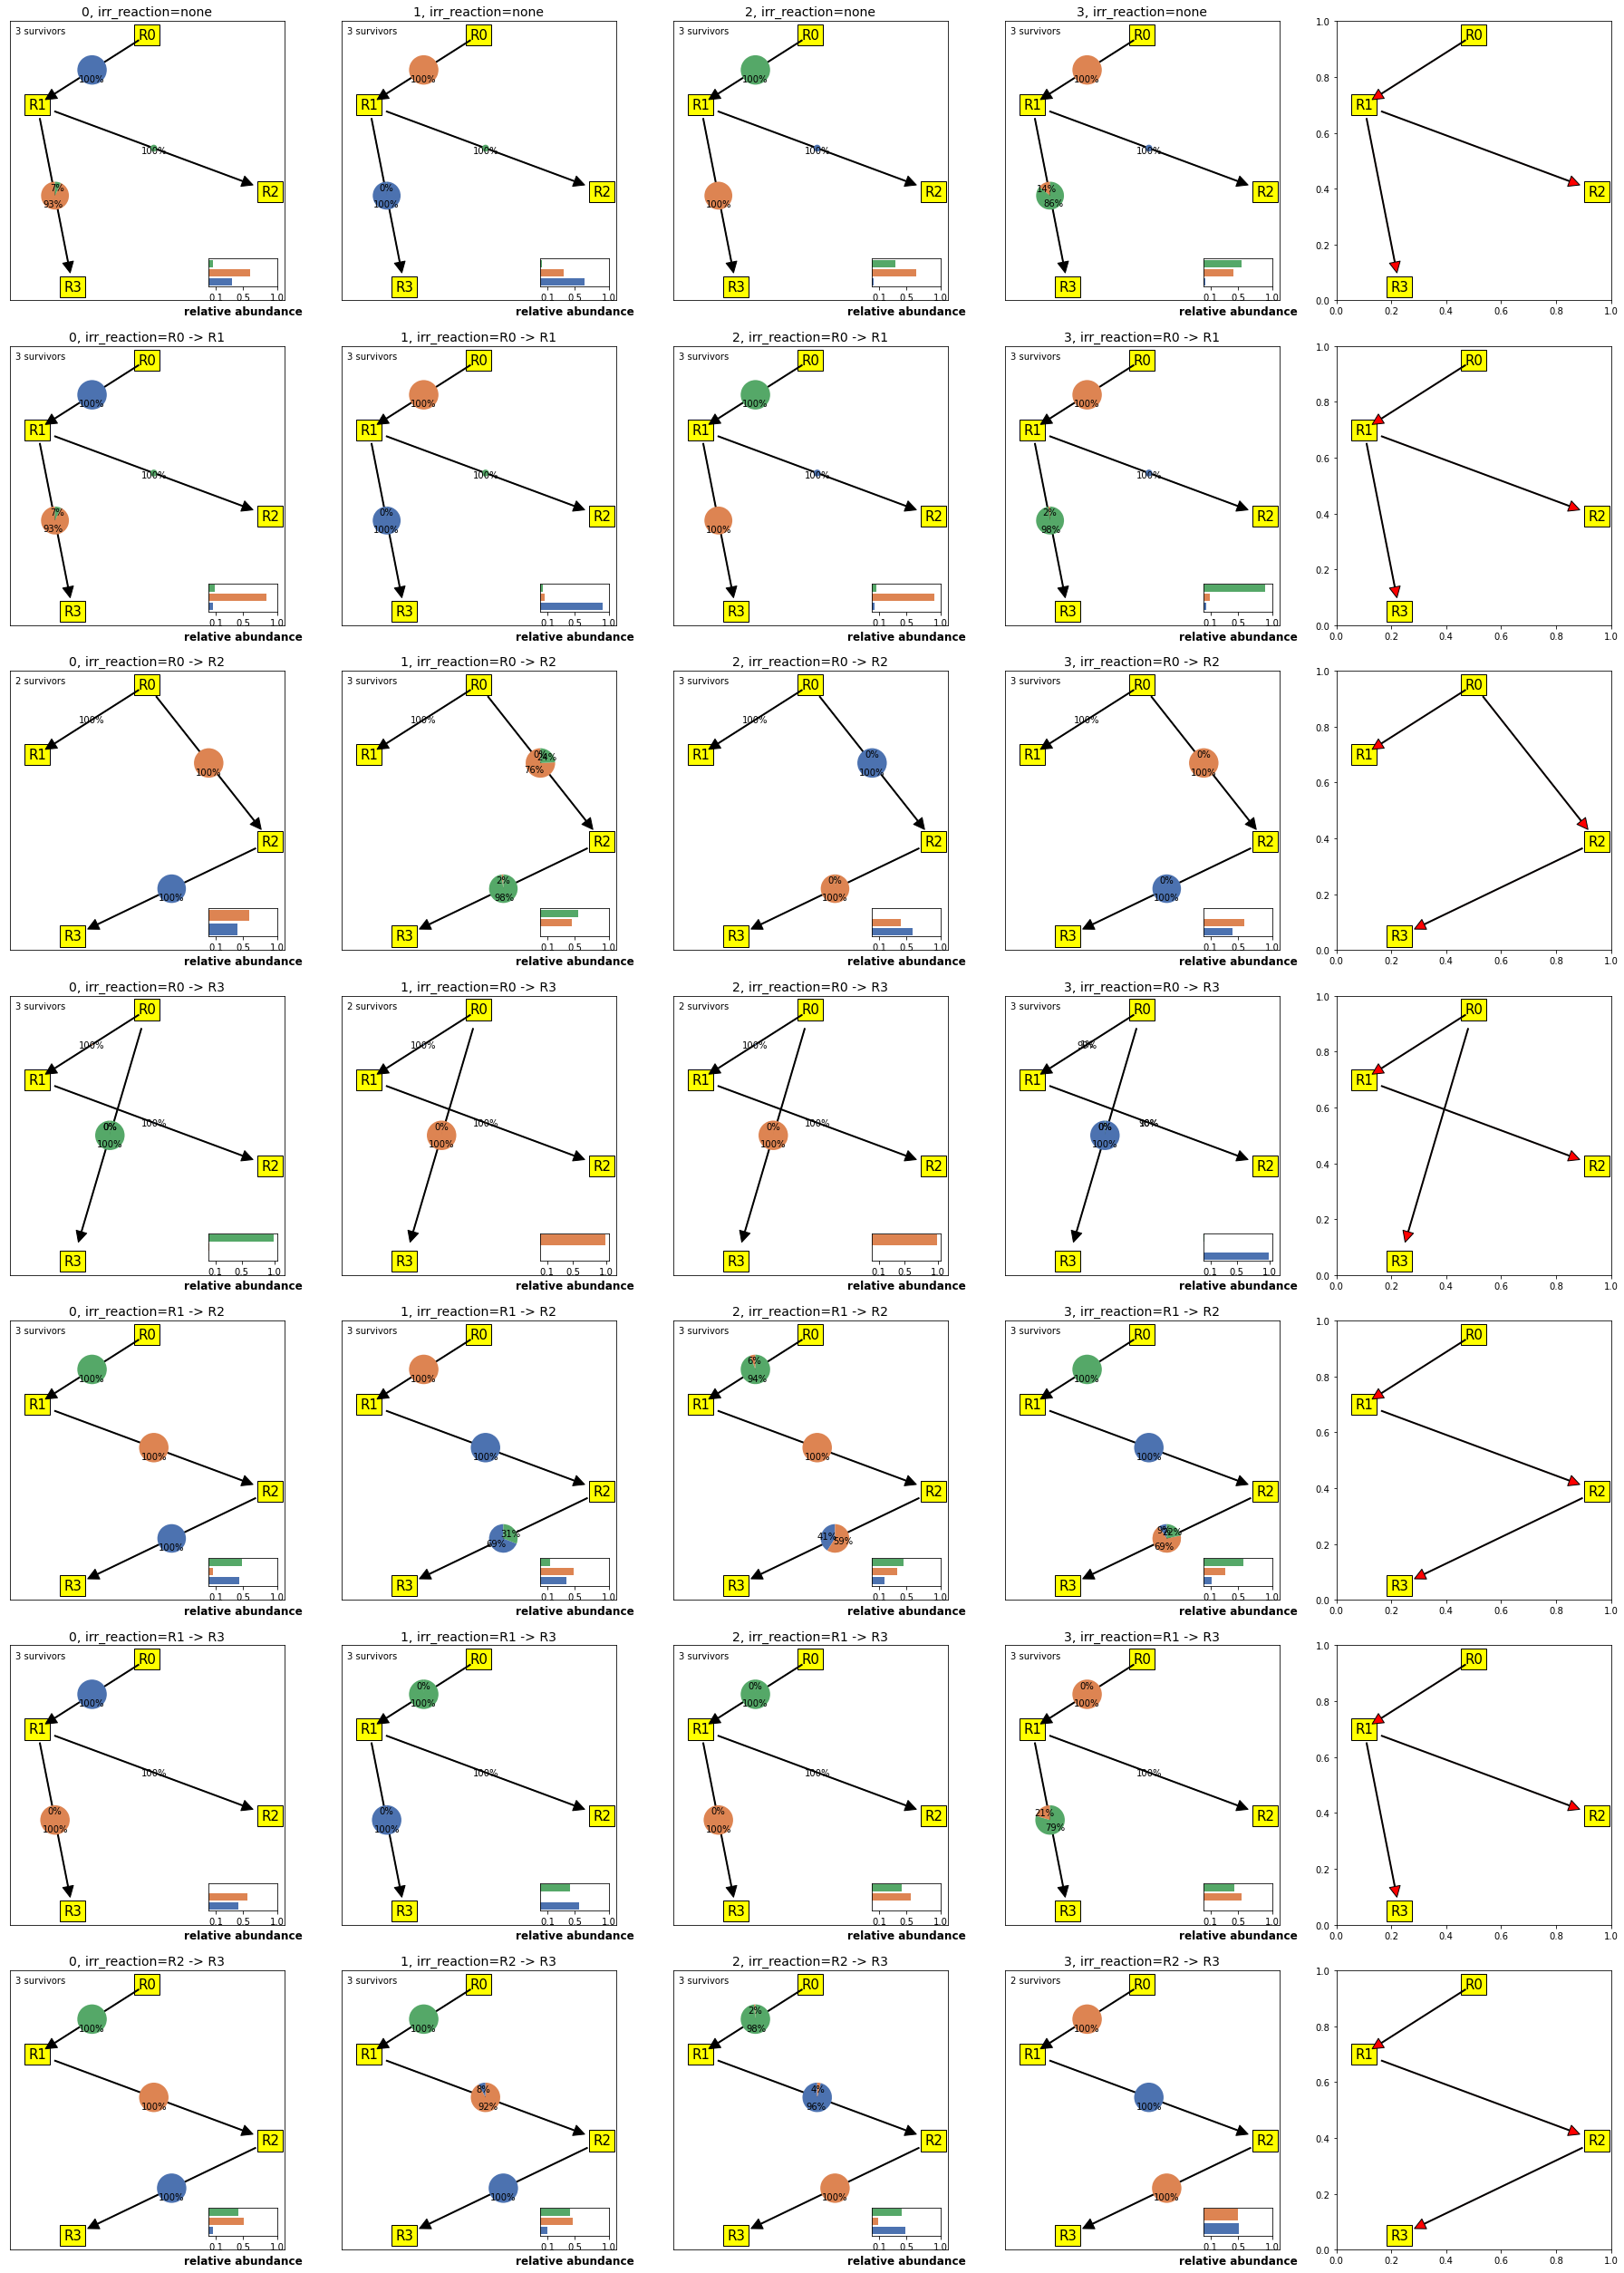

In [43]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S4_1irr_2/'


sim_file_name='sim_1irr-w0.dat'
analysis_file_name = 'analysis_'+sim_file_name

with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)


plot_rxn_nwk_Fluxes_and_maxDissip_piechart(analysis_df,sim_data_df, area_scale_factor=1,
                                     pool_ids=np.arange(4).astype(int),rel_flux_cutoff=1e-5,
                                          param_varied='irr_reaction')


# min_DG_path_list,min_DG_list, DGvals_onpaths_list=get_max_dissipative_rxn_paths(sim_data_df)
# plot_nwk_predicted_by_maxDissip(min_DG_path_list,min_DG_list,sim_data_df,n_resources=4)
# plot_flux_prediction(analysis_df, min_DG_path_list, min_DG_list, sim_data_df,
#                                     n_resources=4)



###### convergence to theory vs observed.

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:544: RuntimeWarning: divide by zero encountered in true_divide


['none', 'R0 -> R1', 'R0 -> R2', 'R0 -> R3', 'R1 -> R2', 'R1 -> R3', 'R2 -> R3']


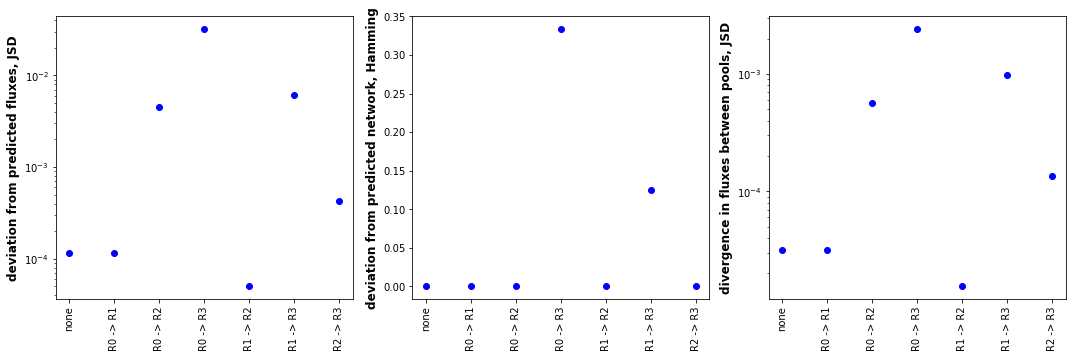

different cutoff
['none', 'R0 -> R1', 'R0 -> R2', 'R0 -> R3', 'R1 -> R2', 'R1 -> R3', 'R2 -> R3']


/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:544: RuntimeWarning: divide by zero encountered in true_divide


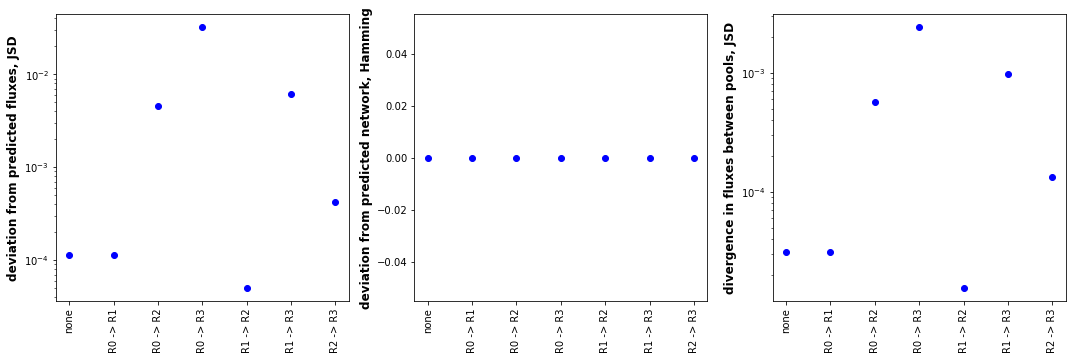

In [9]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S4_1irr_2/'
sim_file_name='sim_1irr-w0.dat'
analysis_file_name = 'analysis_'+sim_file_name
with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)
plot_flux_nwk_prediction_accuracy(analysis_df,sim_data_df,param_varied ='irr_reaction',
                                  pool_ids=np.arange(4).astype(int),return_results=False)

print ('different cutoff')
plot_flux_nwk_prediction_accuracy(analysis_df,sim_data_df,param_varied ='irr_reaction',
                                  pool_ids=np.arange(4).astype(int),
                                  return_results=False,
                                 rel_flux_cutoff=1e-2,verbose=False)

### world1

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


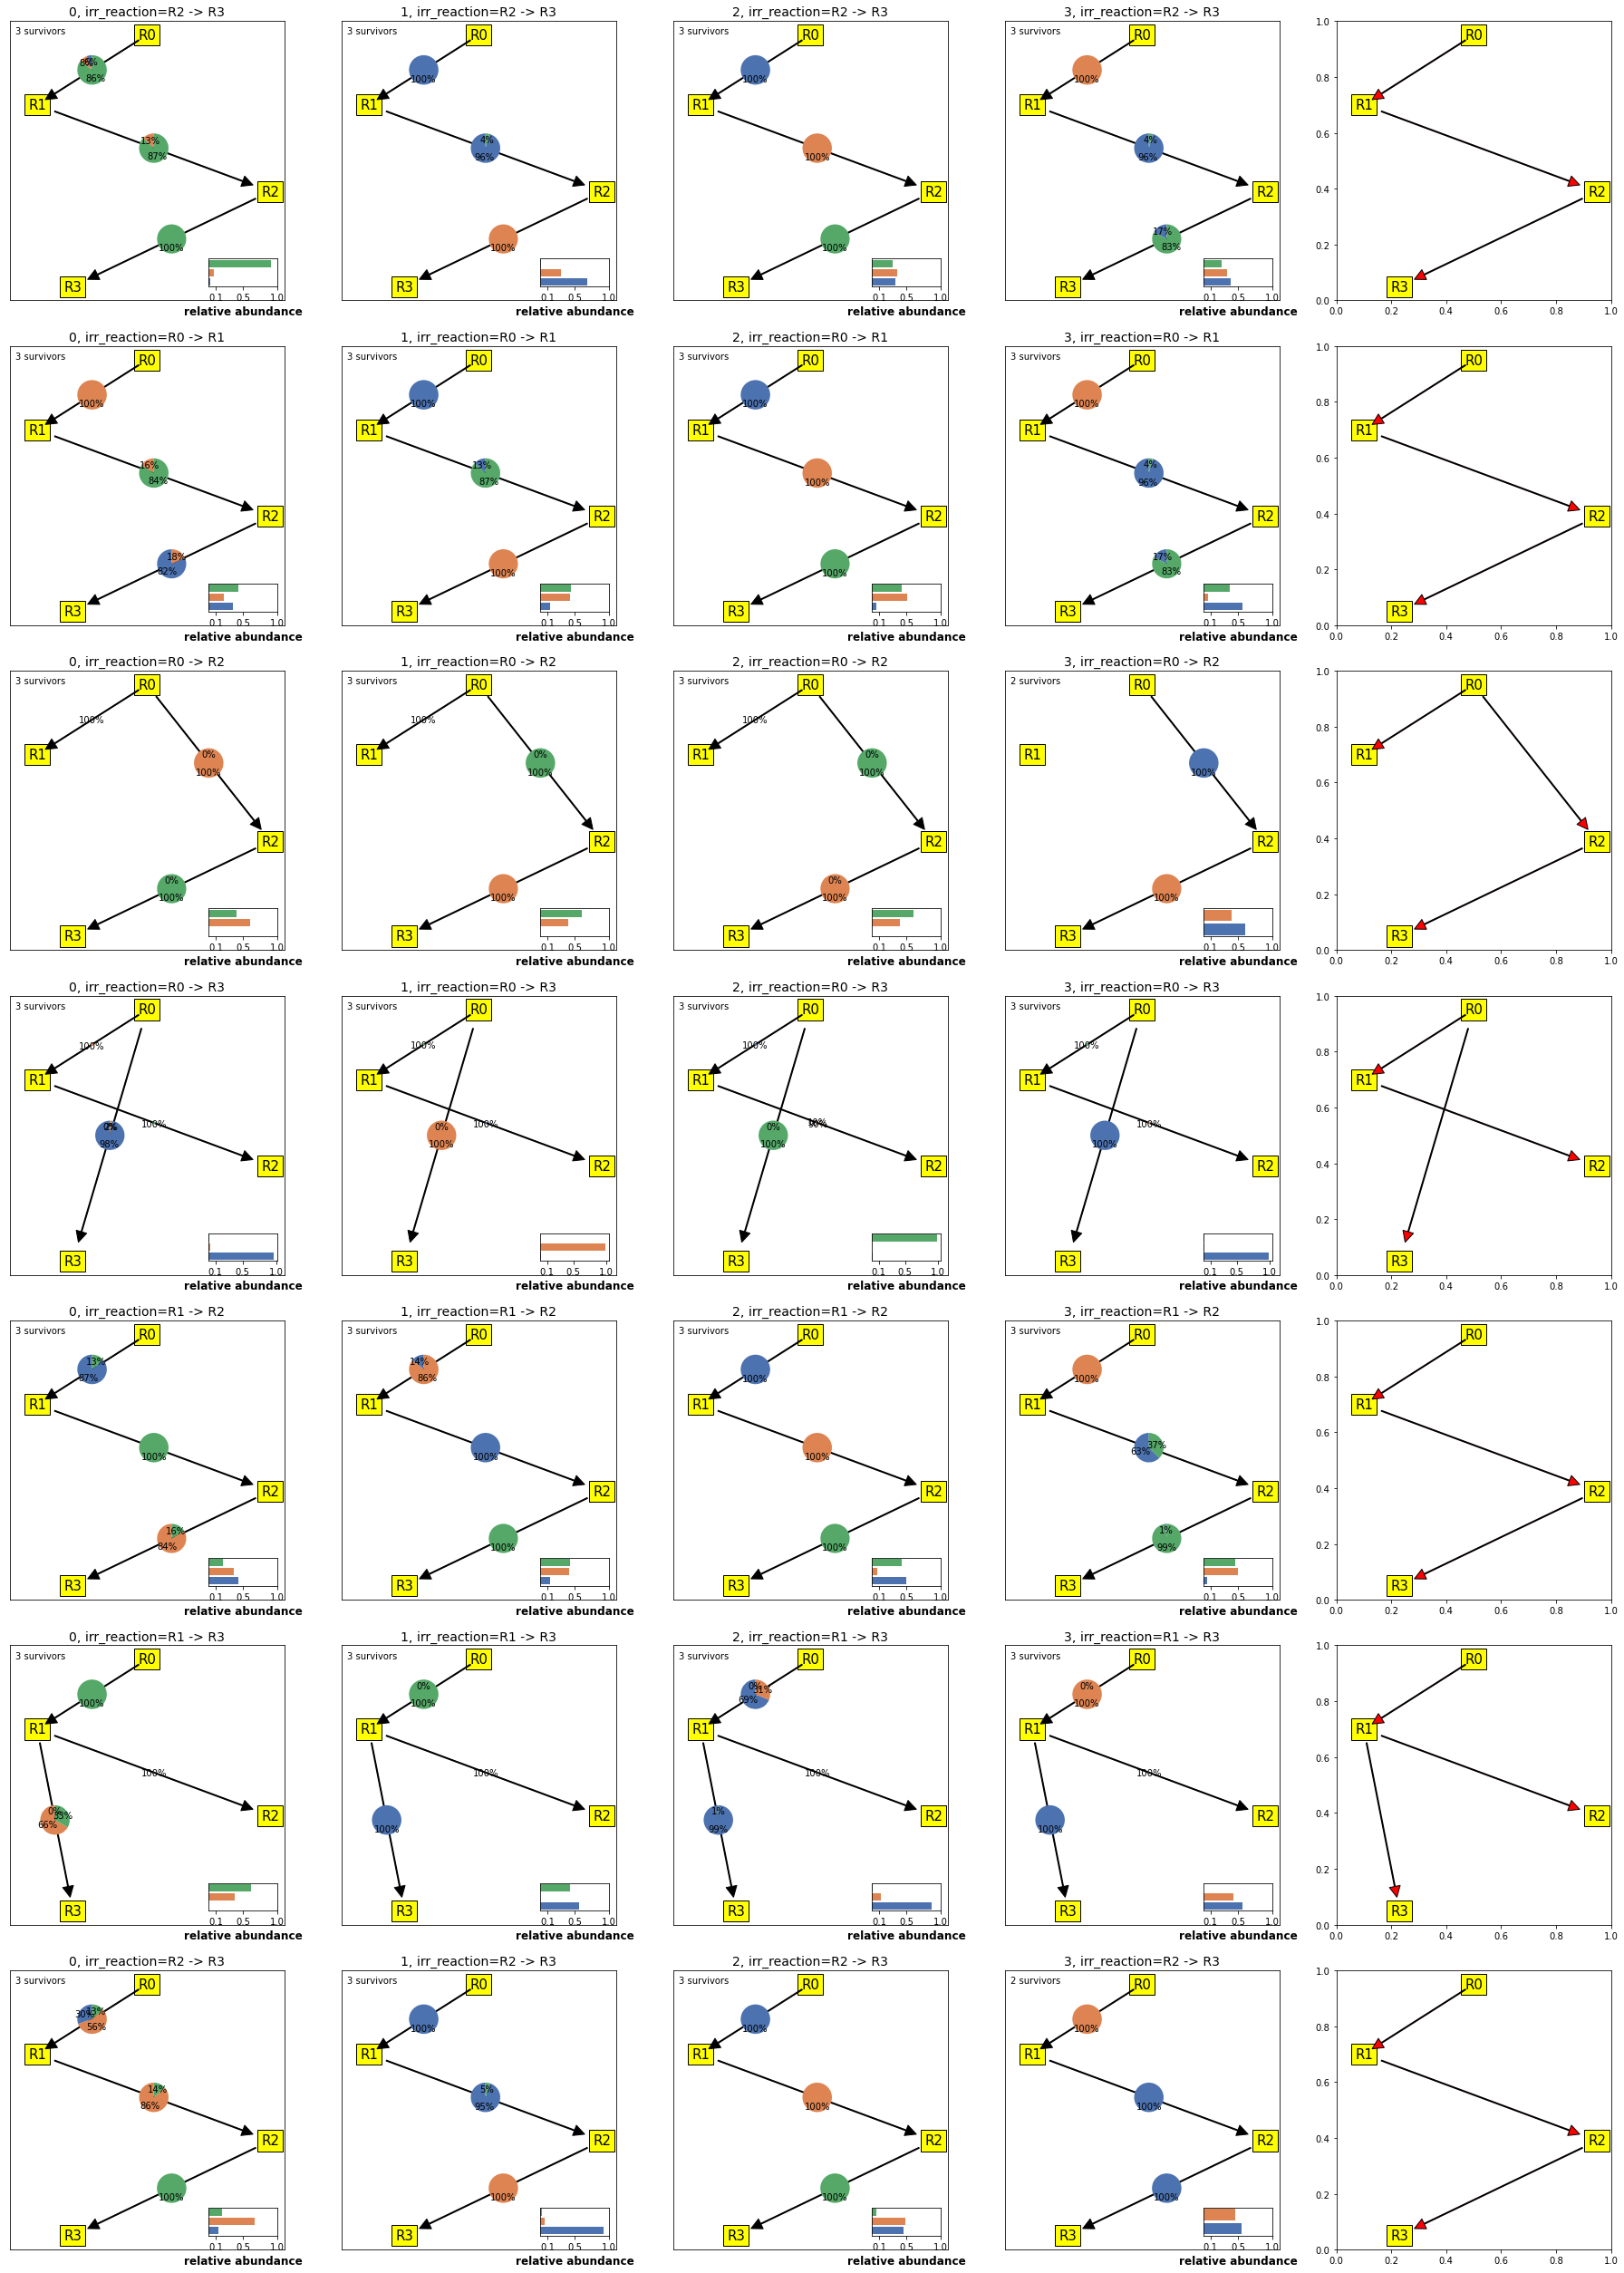

In [15]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S4_1irr_2/'


sim_file_name='sim_1irr-w1.dat'
analysis_file_name = 'analysis_'+sim_file_name

with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)


plot_rxn_nwk_Fluxes_and_maxDissip_piechart(analysis_df,sim_data_df, area_scale_factor=1,
                                     pool_ids=np.arange(4).astype(int),rel_flux_cutoff=1e-5,
                                          param_varied='irr_reaction')


# min_DG_path_list,min_DG_list, DGvals_onpaths_list=get_max_dissipative_rxn_paths(sim_data_df)
# plot_nwk_predicted_by_maxDissip(min_DG_path_list,min_DG_list,sim_data_df,n_resources=4)
# plot_flux_prediction(analysis_df, min_DG_path_list, min_DG_list, sim_data_df,
#                                     n_resources=4)



### average across worlds

In [69]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S4_1irr_2/'
n_worlds=10
filename_prefix='sim_1irr'
plot_average_convergence_across_worlds(filename_prefix,n_worlds,data_folder)

4
(15,) (6,) ()


ValueError: operands could not be broadcast together with shapes (15,) (6,) 

## 6 species

### world 0

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


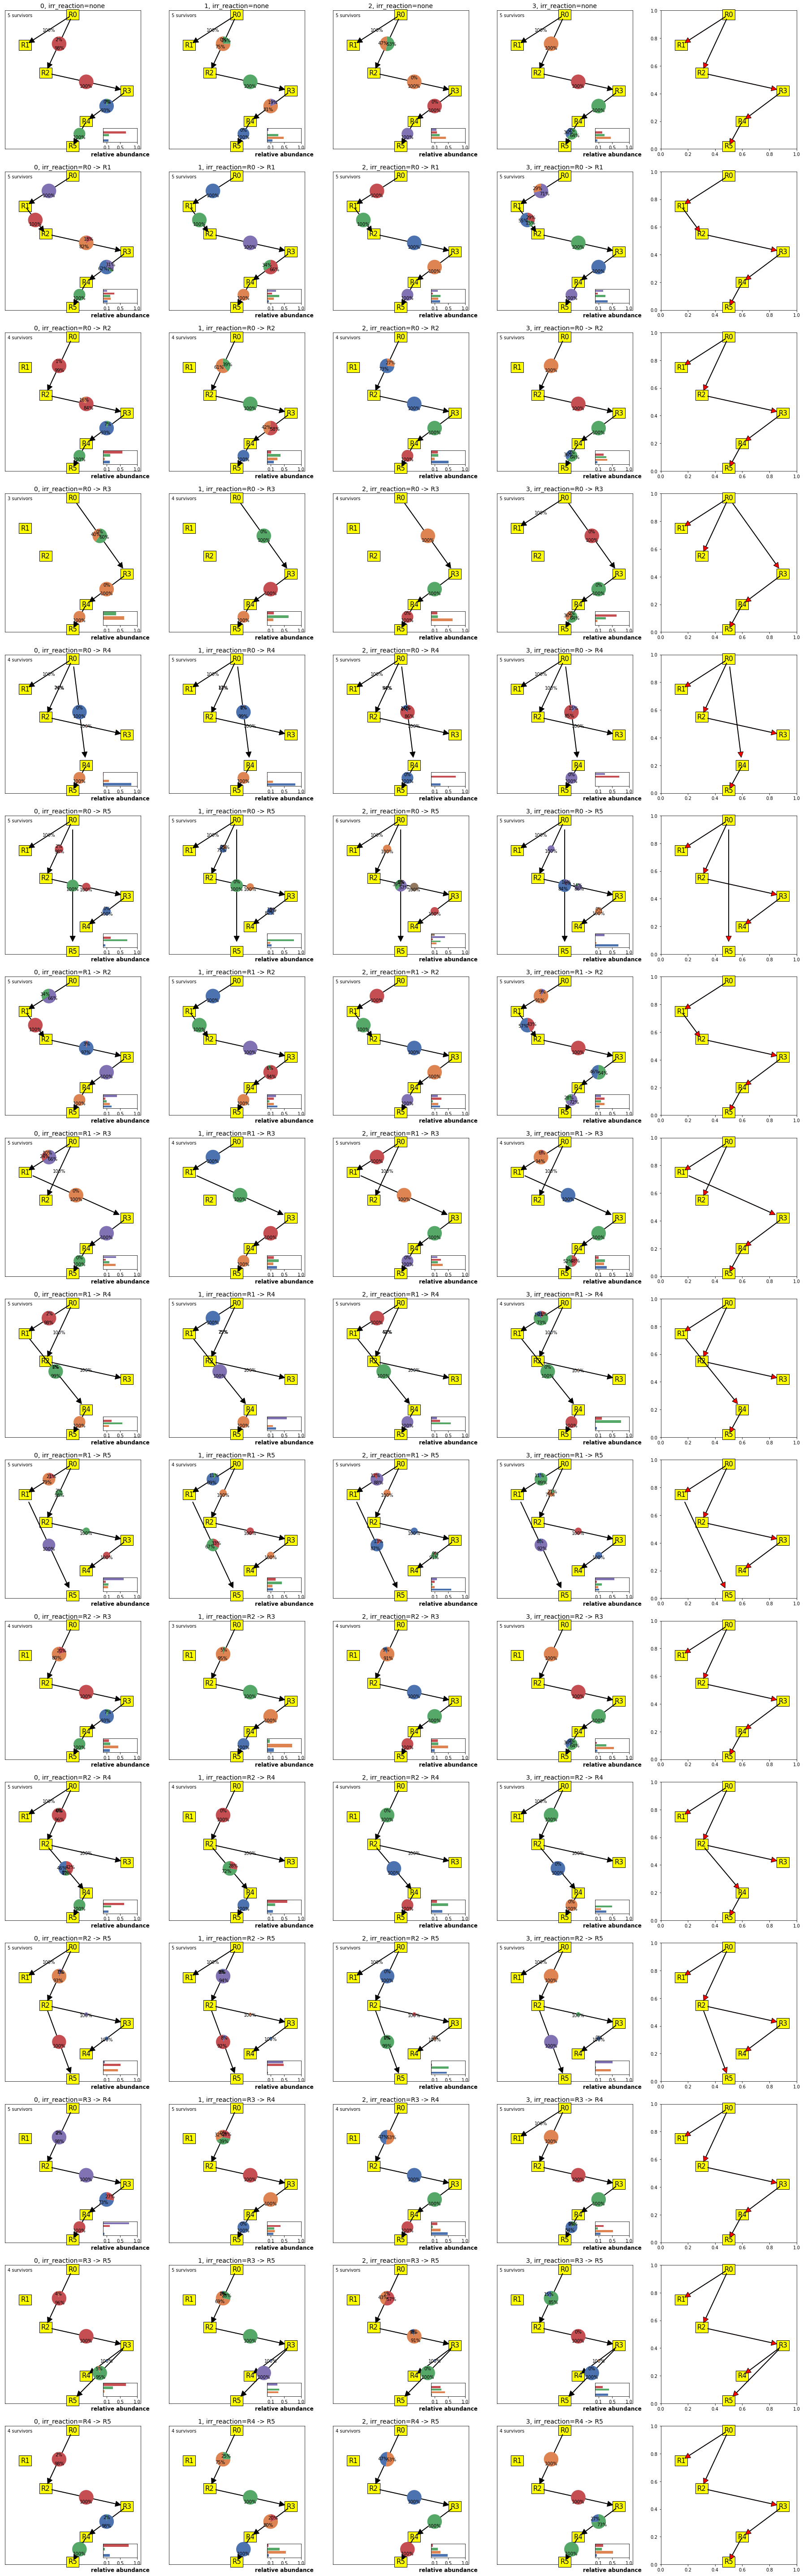

In [76]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S6_1irr_1/'


sim_file_name='sim_1irr-w0.dat'
analysis_file_name = 'analysis_'+sim_file_name

with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)


plot_rxn_nwk_Fluxes_and_maxDissip_piechart(analysis_df,sim_data_df, area_scale_factor=1,
                                     pool_ids=np.arange(4).astype(int),rel_flux_cutoff=1e-5,
                                          param_varied='irr_reaction')

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:544: RuntimeWarning: divide by zero encountered in true_divide


['none', 'R0 -> R1', 'R0 -> R2', 'R0 -> R3', 'R0 -> R4', 'R0 -> R5', 'R1 -> R2', 'R1 -> R3', 'R1 -> R4', 'R1 -> R5', 'R2 -> R3', 'R2 -> R4', 'R2 -> R5', 'R3 -> R4', 'R3 -> R5', 'R4 -> R5']


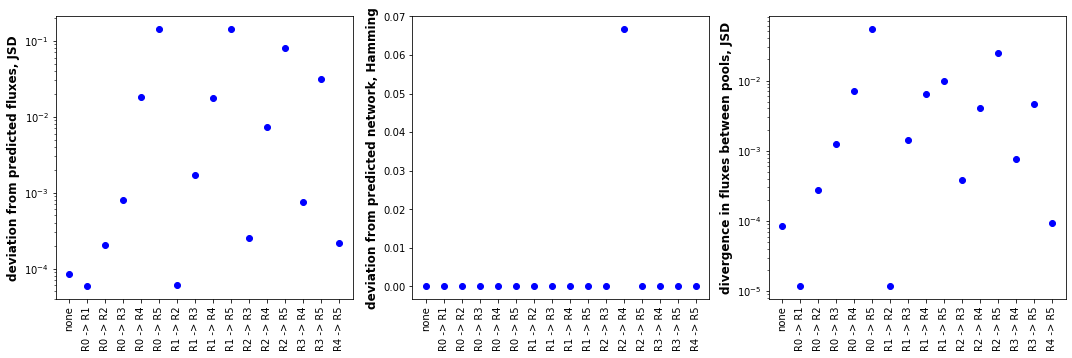

different cutoff
['none', 'R0 -> R1', 'R0 -> R2', 'R0 -> R3', 'R0 -> R4', 'R0 -> R5', 'R1 -> R2', 'R1 -> R3', 'R1 -> R4', 'R1 -> R5', 'R2 -> R3', 'R2 -> R4', 'R2 -> R5', 'R3 -> R4', 'R3 -> R5', 'R4 -> R5']


/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:544: RuntimeWarning: divide by zero encountered in true_divide


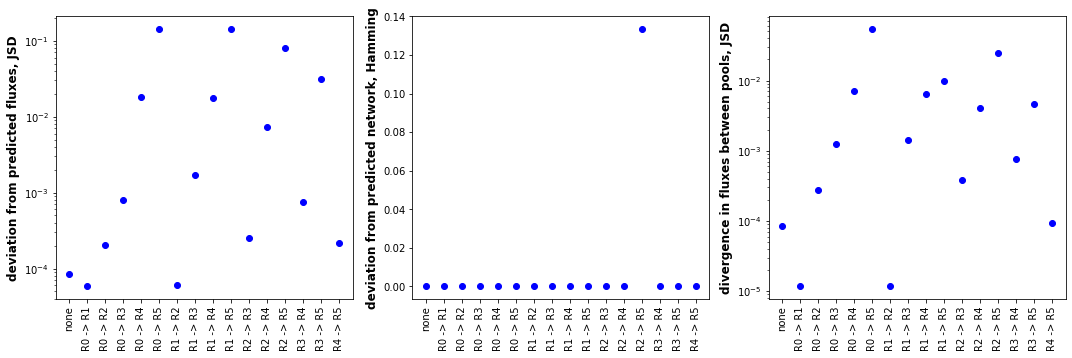

In [10]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S6_1irr_1/'
sim_file_name='sim_1irr-w0.dat'
analysis_file_name = 'analysis_'+sim_file_name
with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)
plot_flux_nwk_prediction_accuracy(analysis_df,sim_data_df,param_varied ='irr_reaction',
                                  pool_ids=np.arange(4).astype(int),return_results=False)

print ('different cutoff')
plot_flux_nwk_prediction_accuracy(analysis_df,sim_data_df,param_varied ='irr_reaction',
                                  pool_ids=np.arange(4).astype(int),
                                  return_results=False,
                                 rel_flux_cutoff=1e-2,verbose=False)

### average across worlds

for sim 1 with 10 worlds

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:566: RuntimeWarning: divide by zero encountered in true_divide


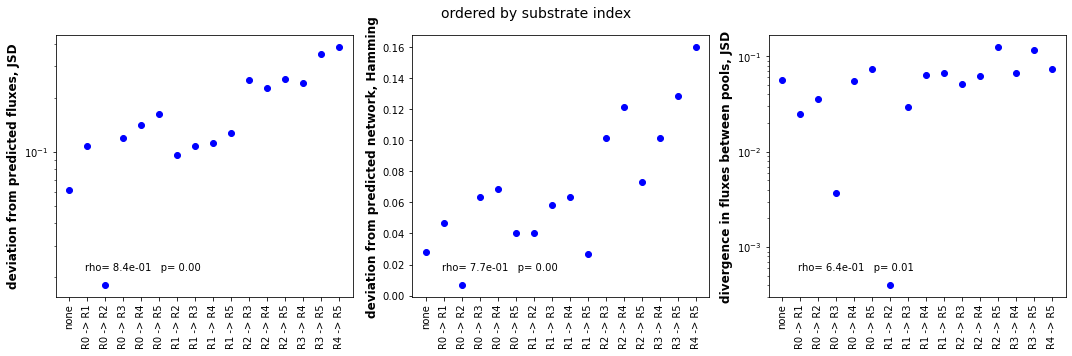

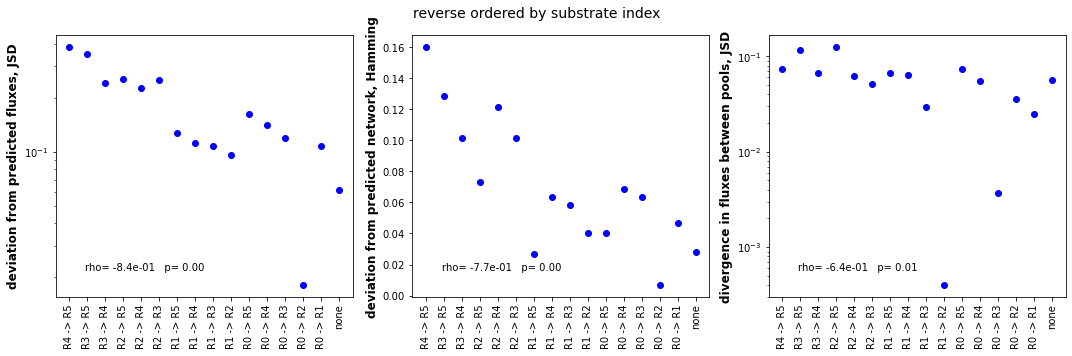

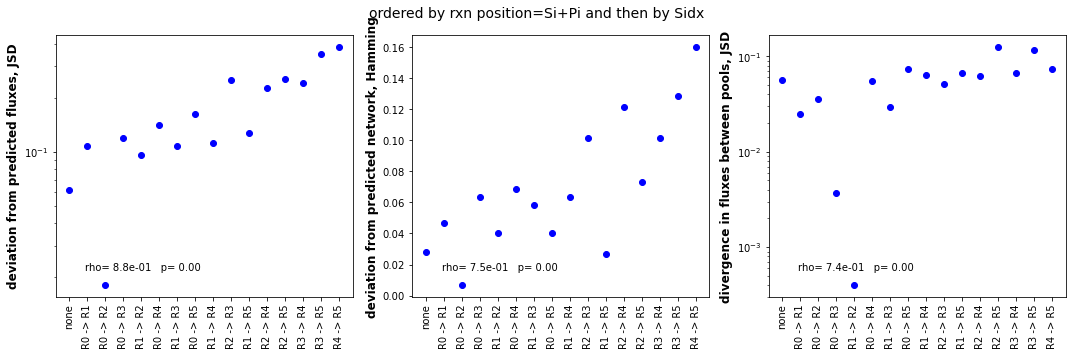

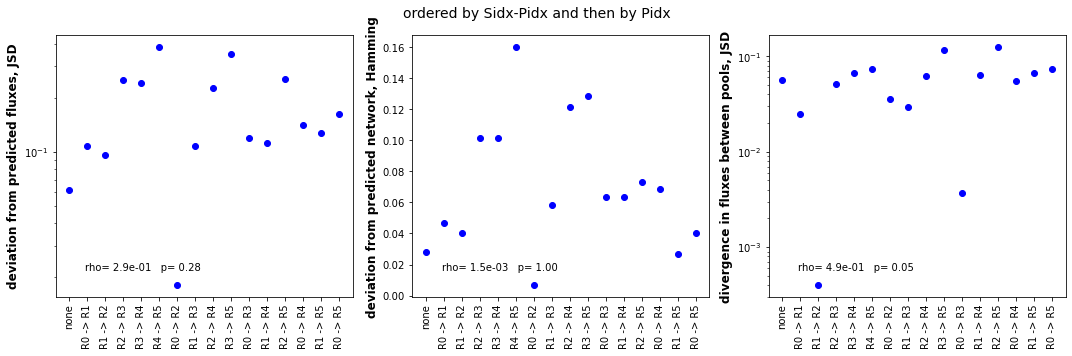

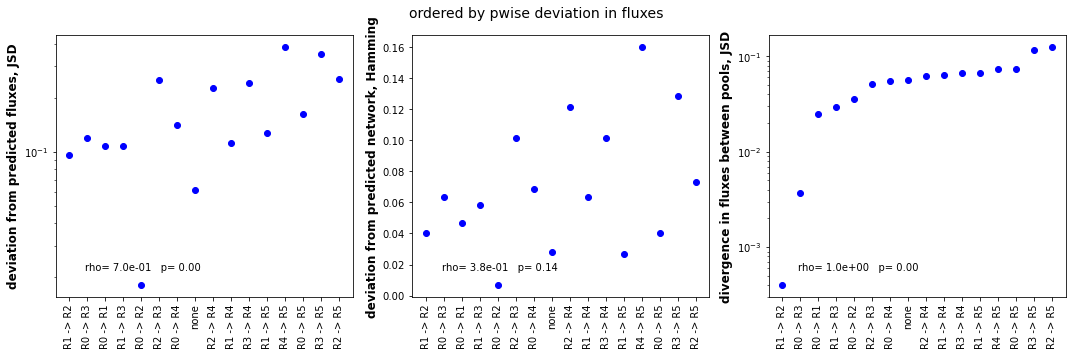

In [10]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S6_1irr_1/'
n_worlds=10
filename_prefix='sim_1irr'


plot_average_convergence_across_worlds(filename_prefix,n_worlds,data_folder)



#### for sim2 with 50 worlds

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:566: RuntimeWarning: divide by zero encountered in true_divide


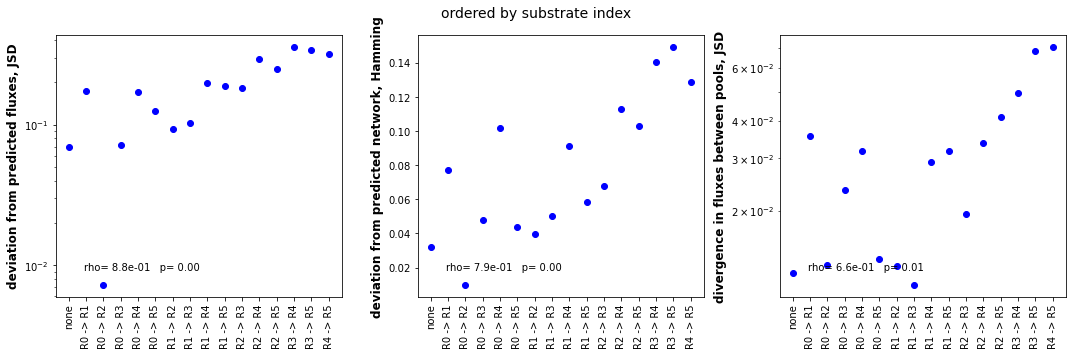

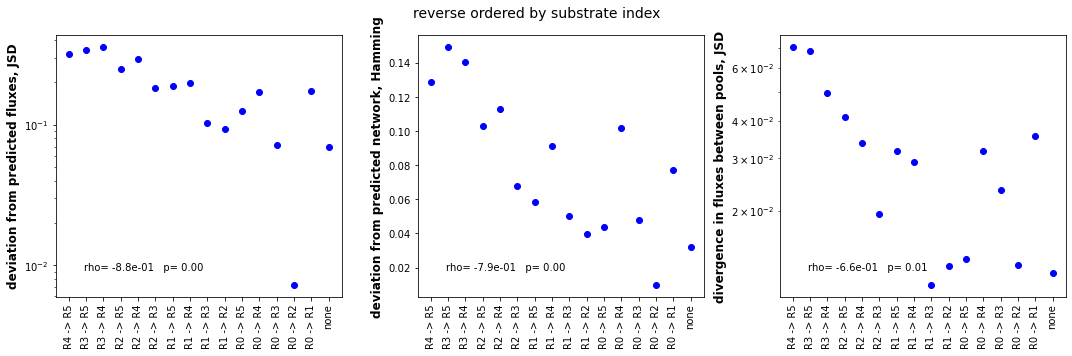

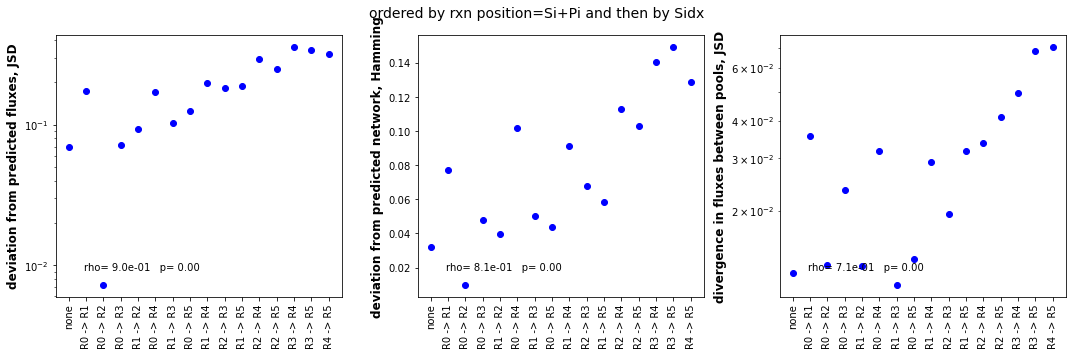

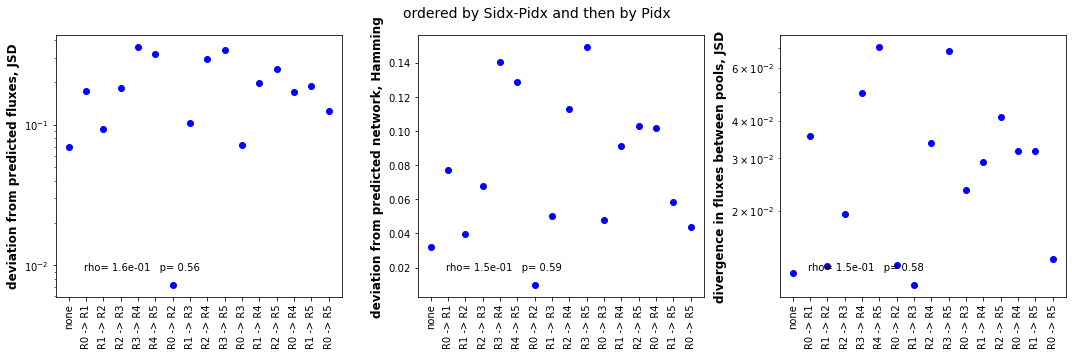

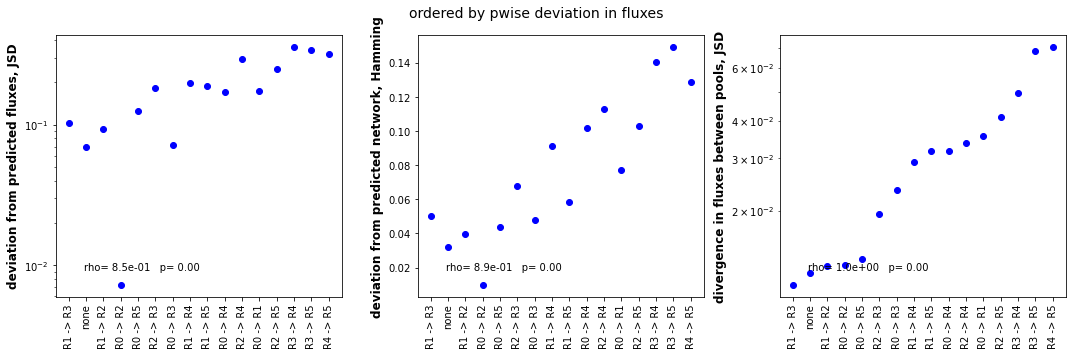

In [9]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S6_1irr_2/'
n_worlds=50
filename_prefix='sim_1irr'


plot_average_convergence_across_worlds(filename_prefix,n_worlds,data_folder, n_pools=5)



#### for sim3 with 50 worlds and slightly larger dG values

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:566: RuntimeWarning: divide by zero encountered in true_divide


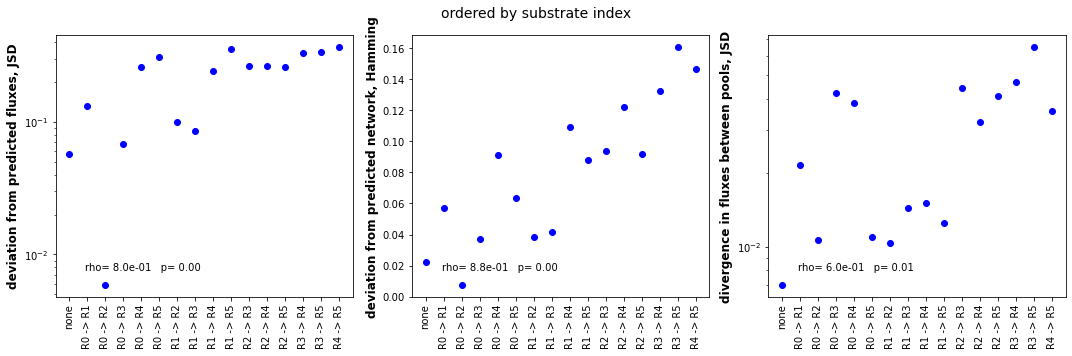

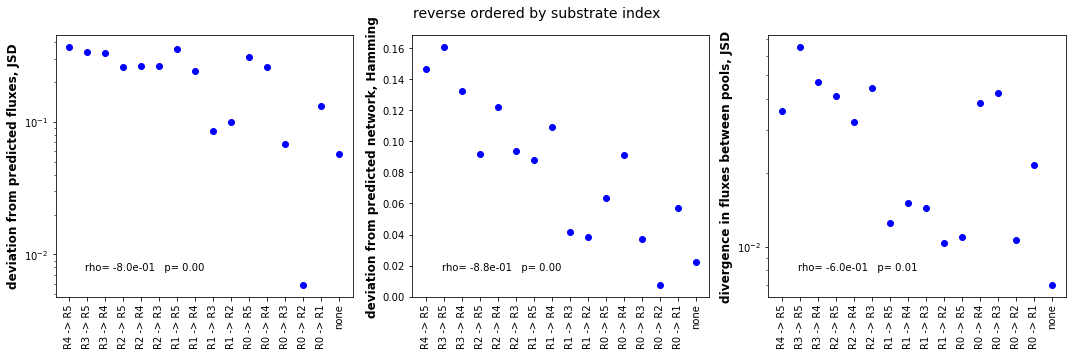

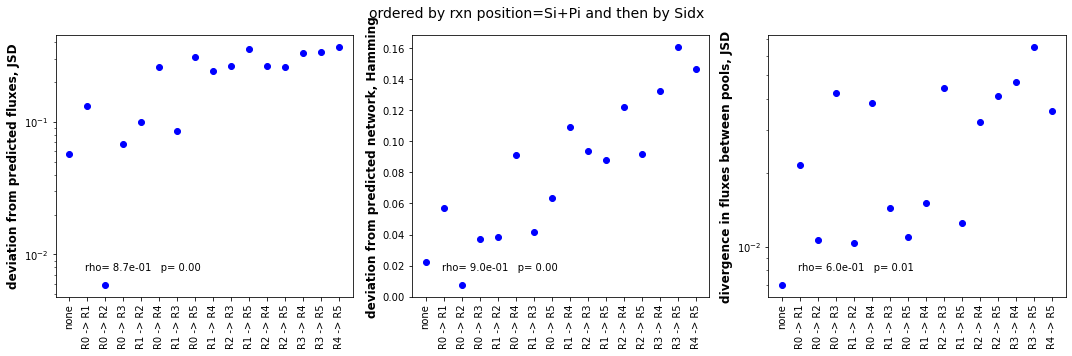

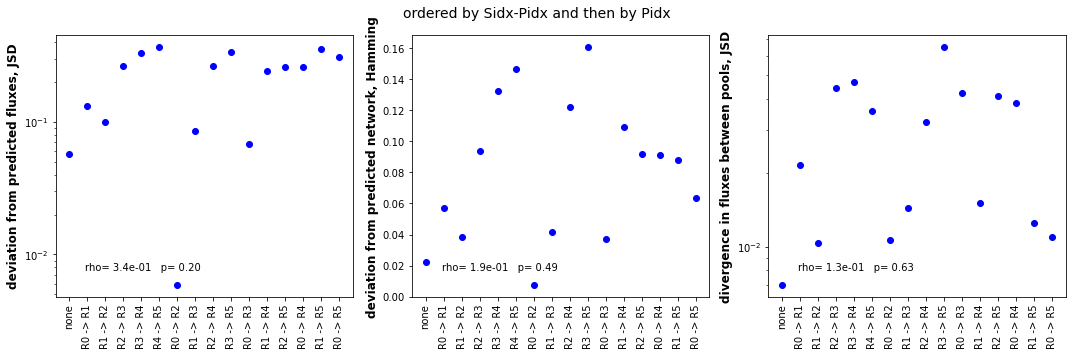

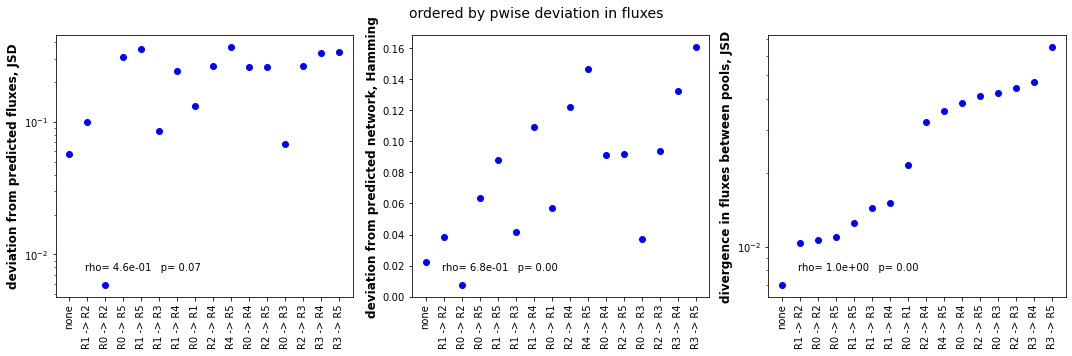

In [7]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/cluster/S6_1irr_3/'
n_worlds=50
filename_prefix='sim_1irr'


plot_average_convergence_across_worlds(filename_prefix,n_worlds,data_folder)



# varying dG scale plots

this was simulated locally using the analytical exploration of model notebook

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


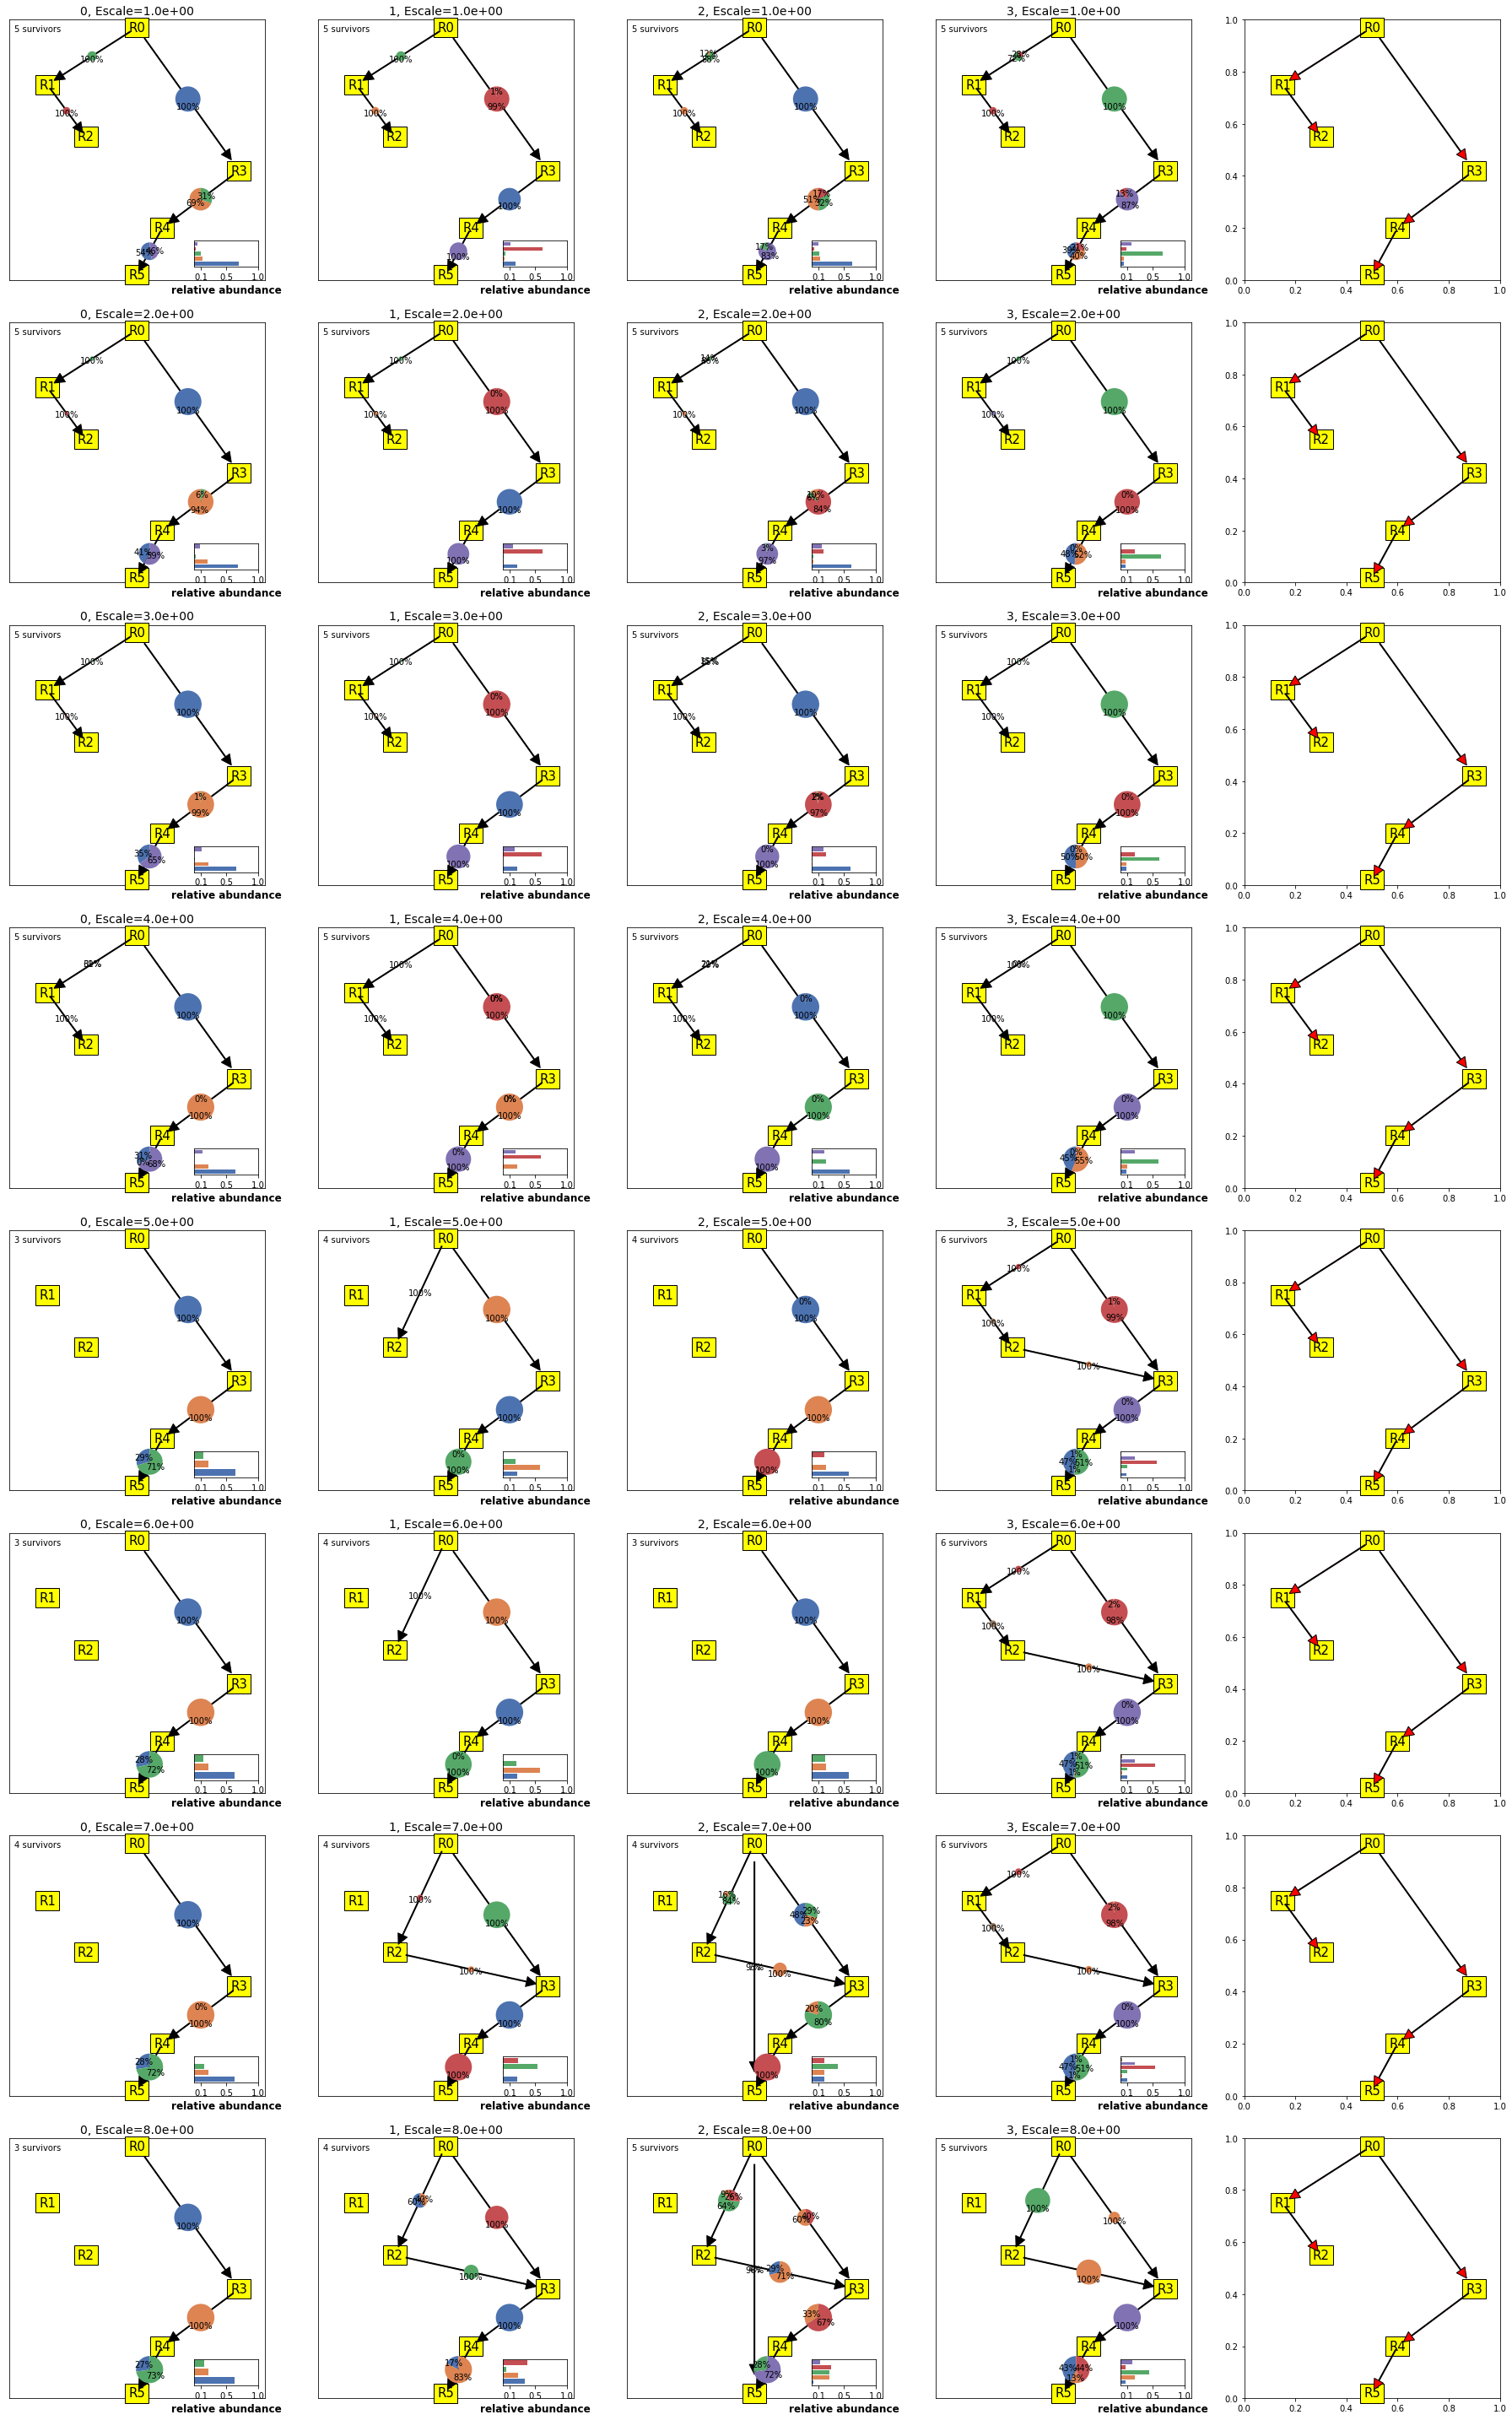

In [36]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/multispecies_sims/'
sim_file_name='6sp_varyE.dat'
analysis_file_name = 'analysis_'+sim_file_name

with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)


plot_rxn_nwk_Fluxes_and_maxDissip_piechart(analysis_df,sim_data_df, area_scale_factor=1,
                                     pool_ids=np.arange(4).astype(int),rel_flux_cutoff=1e-5,
                                          param_varied='Escale')

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:566: RuntimeWarning: divide by zero encountered in true_divide


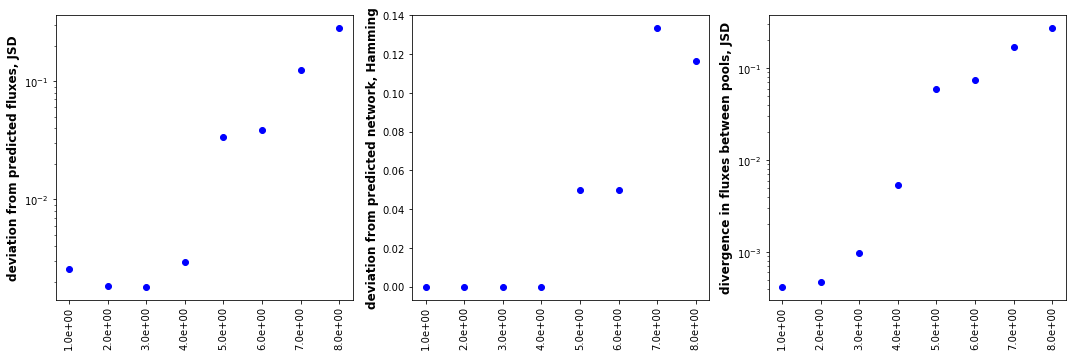

In [37]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/multispecies_sims/'
sim_file_name='6sp_varyE.dat'
analysis_file_name = 'analysis_'+sim_file_name
with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)
plot_flux_nwk_prediction_accuracy(analysis_df,sim_data_df,param_varied ='Escale',
                                  pool_ids=np.arange(4).astype(int),return_results=False)

# varying dG of 1 reaction

## R1-R4 reaction

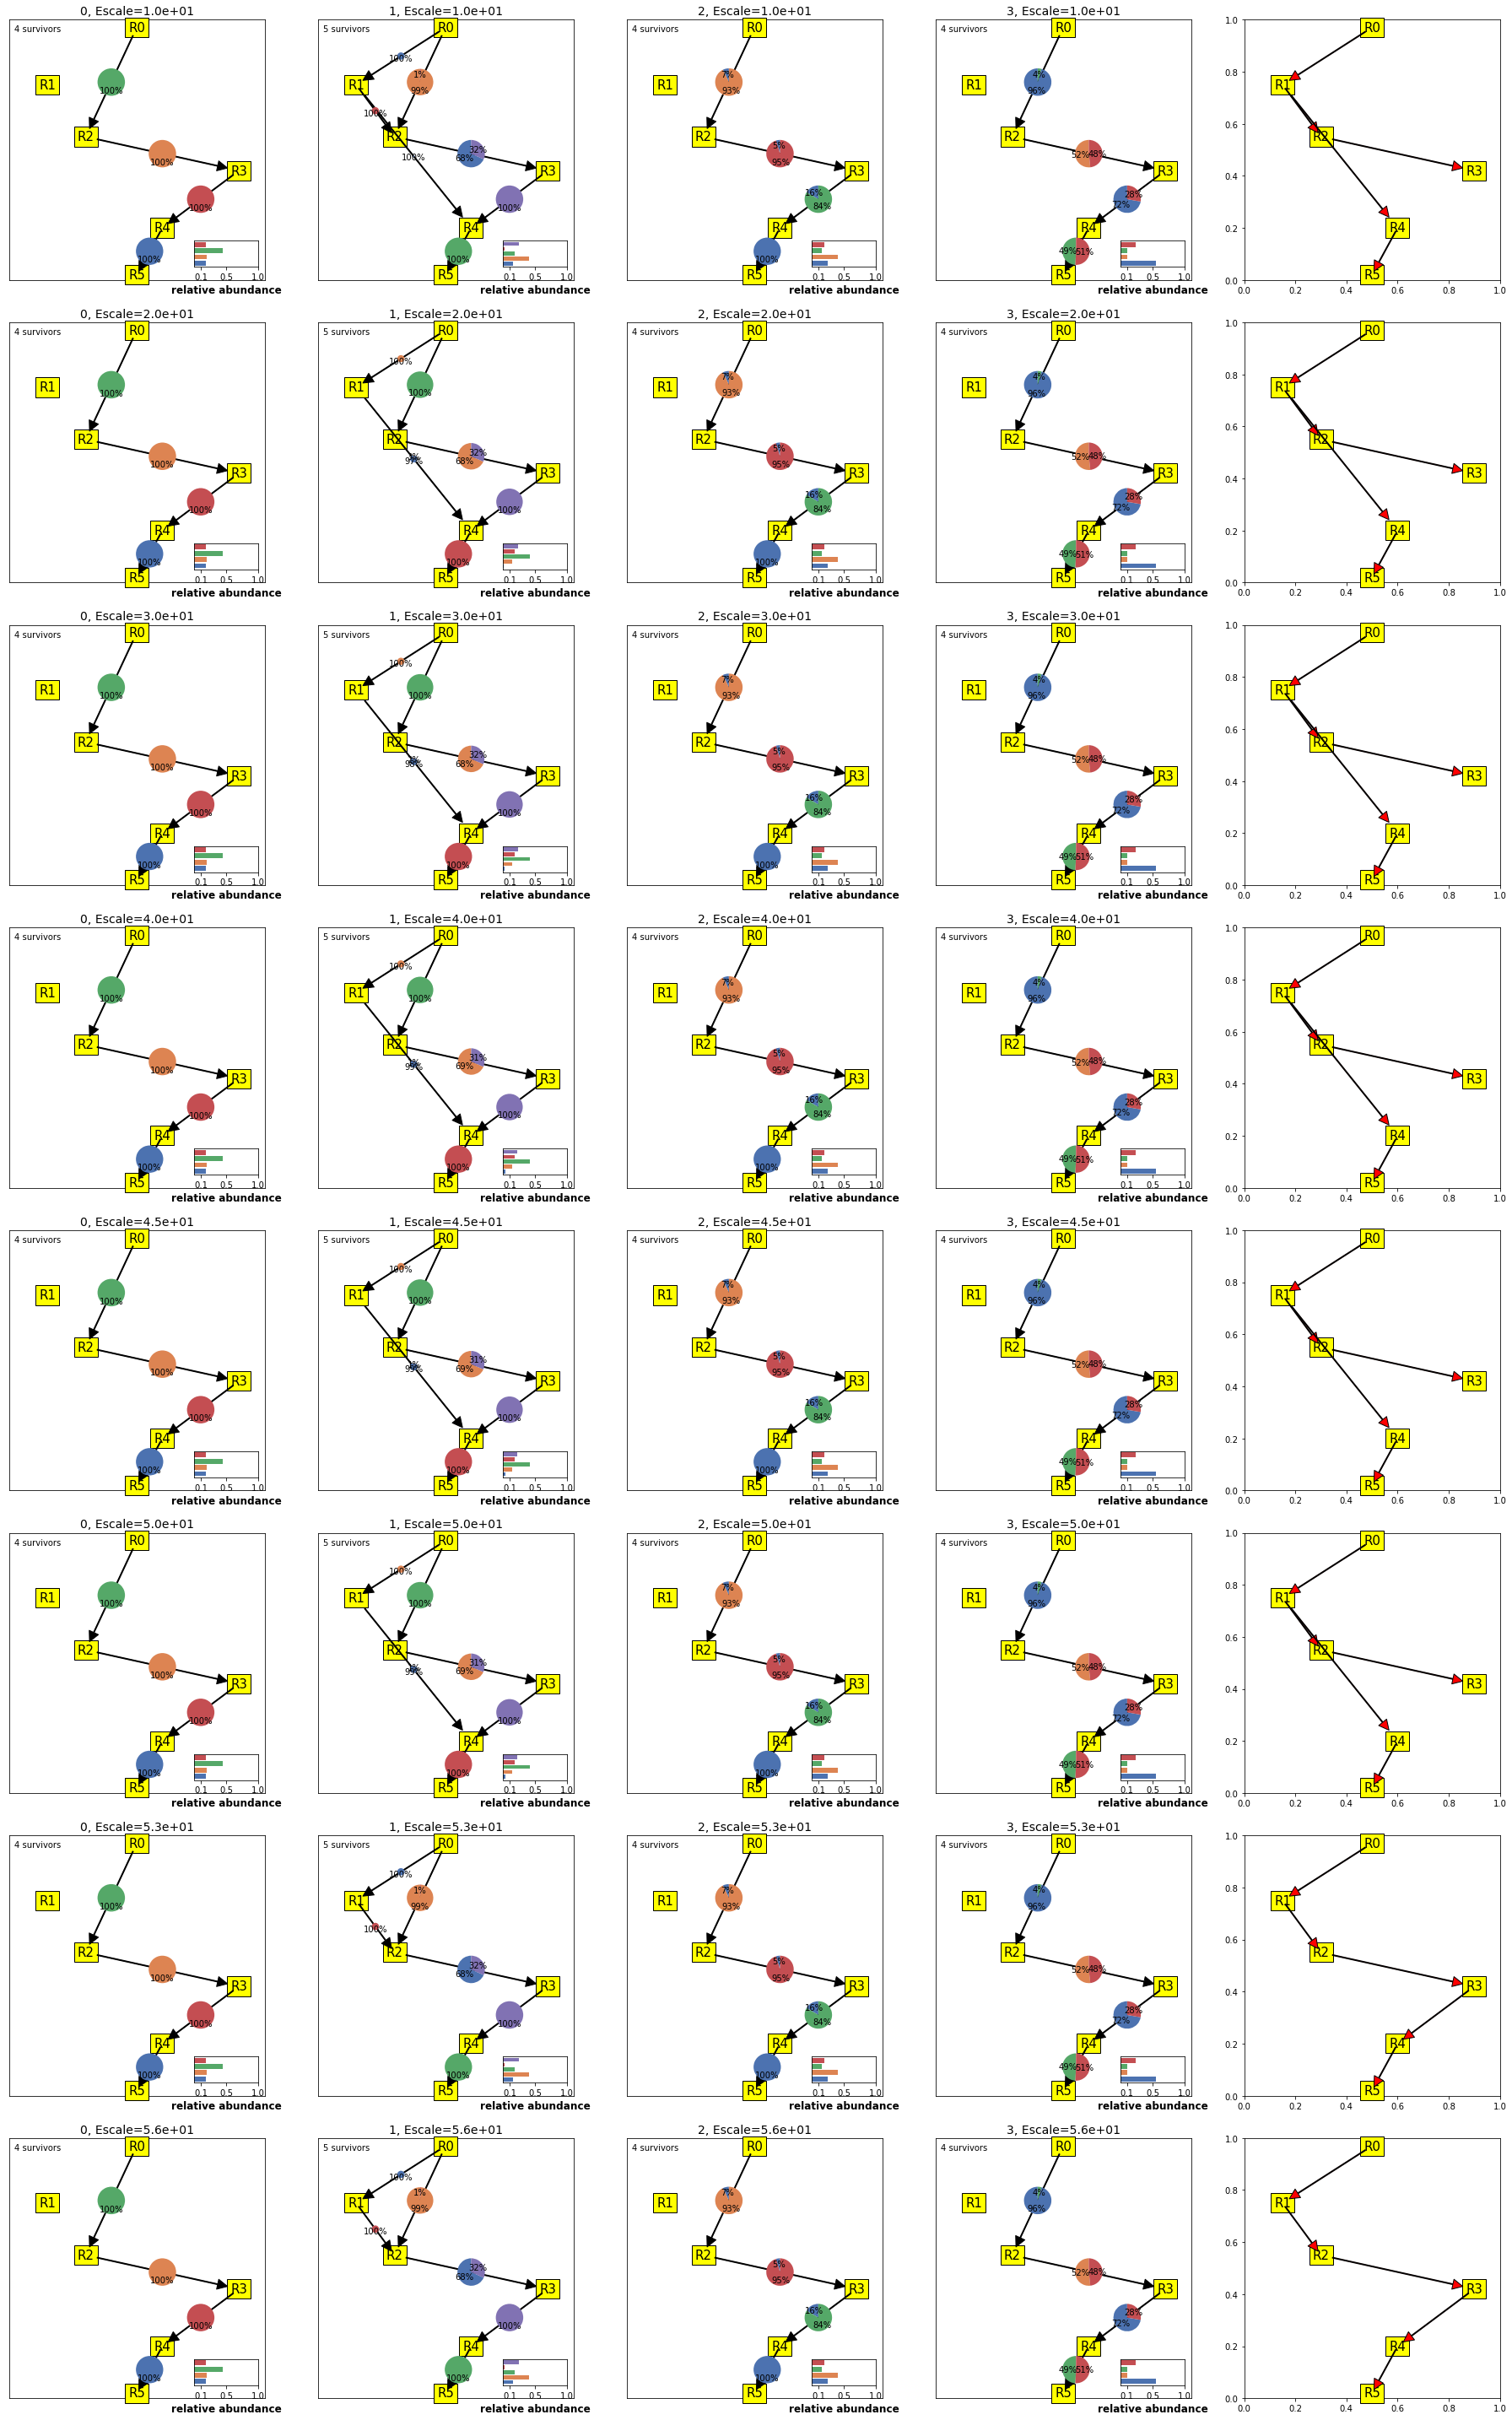

In [11]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/multispecies_sims/'
rxn_changed_idx=7
sim_file_name = '6sp_vary_E1rxn'+str(rxn_changed_idx)+'.dat'    
analysis_file_name = 'analysis_'+sim_file_name

with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)


plot_rxn_nwk_Fluxes_and_maxDissip_piechart(analysis_df,sim_data_df, area_scale_factor=1,
                                     pool_ids=np.arange(4).astype(int),rel_flux_cutoff=1e-5,
                                          param_varied='Escale')

/Users/ashish/anaconda3/envs/thermo/lib/python3.7/site-packages/ipykernel_launcher.py:566: RuntimeWarning: divide by zero encountered in true_divide


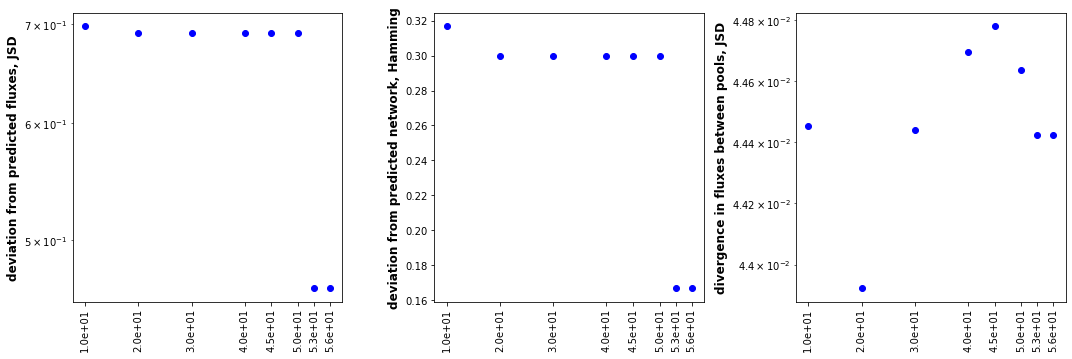

In [12]:
data_folder='/Users/ashish/Downloads/simple_metabolic_CR_model_simdata/multispecies_sims/'
rxn_changed_idx=7
sim_file_name = '6sp_vary_E1rxn'+str(rxn_changed_idx)+'.dat'    
analysis_file_name = 'analysis_'+sim_file_name
with open(data_folder+analysis_file_name, 'rb') as f:
    analysis_df = pickle.load(f)
with open(data_folder+sim_file_name, 'rb') as f:
    sim_data_df = pickle.load(f)
plot_flux_nwk_prediction_accuracy(analysis_df,sim_data_df,param_varied ='Escale',
                                  pool_ids=np.arange(4).astype(int),return_results=False)